In [60]:
from keras.layers import Input, Dense, Flatten, Conv2D, LeakyReLU, Reshape, BatchNormalization
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.datasets import mnist


import numpy as np
import matplotlib.pyplot as plt

In [61]:
class GAN():
    
    def __init__(self):
        
        self.img_rows = 28
        self.img_cols = 28
        self.img_channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.img_channels)
        self.latent_dim = 100
        
        optimizer = Adam(0.0002, 0.5)
        
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
        self.generator = self.build_generator()
        
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        
        self.discriminator.trainable = False
        validity = self.discriminator(img)
        
        self.combimed = Model(z, validity)
        self.combimed.compile(loss='binary_crossentropy', optimizer=optimizer)
        
    def build_discriminator(self):
            
            model = Sequential()
            model.add(Flatten(input_shape=self.img_shape))
            model.add(Dense(512))
            model.add(LeakyReLU(alpha=0.2))
            model.add(Dense(256))
            model.add(LeakyReLU(alpha=0.2))
            model.add(Dense(1, activation='sigmoid'))
            model.summary()
            
            img = Input(shape=self.img_shape)
            validity = model(img)
            
            return Model(img, validity)
        
        
    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))
        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)
    
    def train(self, epochs, batch_size=128, sample_interval=200, plot_freq=20):
        
        (X_train, _), (_, _) = mnist.load_data()
        
        X_train = X_train / 127.5 - 1
        X_train = np.expand_dims(X_train, axis=3)
        
        real = np.ones(shape=(batch_size, 1))
        fake = np.zeros(shape=(batch_size, 1))
        
        for i in range(epochs+1):
        
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, size=(batch_size, self.latent_dim))
            
            predicted_imgs = self.generator.predict(noise)
            
            d_real_loss = self.discriminator.train_on_batch(imgs, real)
            d_fake_loss = self.discriminator.train_on_batch(predicted_imgs, fake)
            
            d_total_loss = 0.5 * (np.add(d_fake_loss, d_real_loss))
            
            noise = np.random.normal(0, 1, size=(batch_size, self.latent_dim))
            
            g_loss = self.combimed.train_on_batch(noise, real)
            
            print('epoch %d [D:loss %.2f D:acc %.2f] [G:loss %.2f]' % (i+1, d_total_loss[0], 100*d_total_loss[1],  g_loss))
            
            if i % sample_interval == 0:
                self.sample_images()
        
    
    def sample_images(self):
        
        z = np.random.normal(0, 1, size=(1, self.latent_dim))
        
        img = self.generator.predict(z)
        img = 0.5 * img[0] + 0.5
        
        plt.imshow(img[:, :, 0], cmap='gray')
        plt.show()
            

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_161 (Dense)            (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_114 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_115 (LeakyReLU)  (None, 256)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________
____

C:\Users\Aakash\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch 1 [D:loss 0.57 D:acc 53.12] [G:loss 0.53]


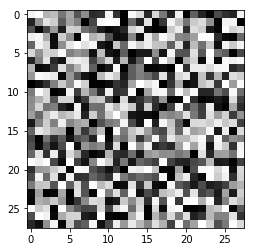

epoch 2 [D:loss 0.50 D:acc 57.81] [G:loss 0.66]
epoch 3 [D:loss 0.40 D:acc 67.19] [G:loss 0.80]
epoch 4 [D:loss 0.28 D:acc 90.62] [G:loss 0.94]
epoch 5 [D:loss 0.22 D:acc 95.31] [G:loss 1.19]
epoch 6 [D:loss 0.20 D:acc 98.44] [G:loss 1.24]
epoch 7 [D:loss 0.19 D:acc 96.88] [G:loss 1.42]
epoch 8 [D:loss 0.17 D:acc 100.00] [G:loss 1.60]
epoch 9 [D:loss 0.13 D:acc 100.00] [G:loss 1.67]
epoch 10 [D:loss 0.12 D:acc 100.00] [G:loss 1.88]
epoch 11 [D:loss 0.10 D:acc 100.00] [G:loss 1.93]
epoch 12 [D:loss 0.08 D:acc 100.00] [G:loss 1.97]
epoch 13 [D:loss 0.09 D:acc 100.00] [G:loss 2.04]
epoch 14 [D:loss 0.08 D:acc 100.00] [G:loss 2.20]
epoch 15 [D:loss 0.07 D:acc 100.00] [G:loss 2.19]
epoch 16 [D:loss 0.08 D:acc 98.44] [G:loss 2.31]
epoch 17 [D:loss 0.07 D:acc 100.00] [G:loss 2.41]
epoch 18 [D:loss 0.06 D:acc 100.00] [G:loss 2.53]
epoch 19 [D:loss 0.05 D:acc 100.00] [G:loss 2.54]
epoch 20 [D:loss 0.06 D:acc 100.00] [G:loss 2.54]
epoch 21 [D:loss 0.05 D:acc 100.00] [G:loss 2.67]
epoch 22 [D:los

epoch 167 [D:loss 0.05 D:acc 100.00] [G:loss 4.25]
epoch 168 [D:loss 0.32 D:acc 85.94] [G:loss 3.20]
epoch 169 [D:loss 0.09 D:acc 96.88] [G:loss 4.36]
epoch 170 [D:loss 0.23 D:acc 87.50] [G:loss 4.10]
epoch 171 [D:loss 0.12 D:acc 96.88] [G:loss 4.16]
epoch 172 [D:loss 0.49 D:acc 79.69] [G:loss 4.19]
epoch 173 [D:loss 0.16 D:acc 96.88] [G:loss 3.90]
epoch 174 [D:loss 0.32 D:acc 85.94] [G:loss 3.32]
epoch 175 [D:loss 0.15 D:acc 95.31] [G:loss 4.51]
epoch 176 [D:loss 0.70 D:acc 64.06] [G:loss 1.52]
epoch 177 [D:loss 0.78 D:acc 71.88] [G:loss 2.80]
epoch 178 [D:loss 0.05 D:acc 100.00] [G:loss 4.76]
epoch 179 [D:loss 0.62 D:acc 64.06] [G:loss 1.61]
epoch 180 [D:loss 0.52 D:acc 71.88] [G:loss 2.61]
epoch 181 [D:loss 0.08 D:acc 98.44] [G:loss 4.39]
epoch 182 [D:loss 0.09 D:acc 100.00] [G:loss 3.99]
epoch 183 [D:loss 0.16 D:acc 93.75] [G:loss 3.29]
epoch 184 [D:loss 0.13 D:acc 96.88] [G:loss 4.08]
epoch 185 [D:loss 0.27 D:acc 85.94] [G:loss 3.72]
epoch 186 [D:loss 0.26 D:acc 87.50] [G:loss 3.7

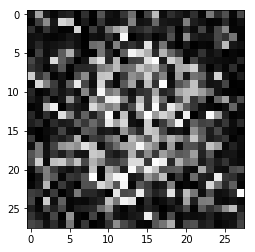

epoch 202 [D:loss 0.20 D:acc 89.06] [G:loss 3.65]
epoch 203 [D:loss 0.38 D:acc 82.81] [G:loss 2.80]
epoch 204 [D:loss 0.26 D:acc 87.50] [G:loss 3.61]
epoch 205 [D:loss 0.29 D:acc 87.50] [G:loss 3.31]
epoch 206 [D:loss 0.34 D:acc 84.38] [G:loss 2.98]
epoch 207 [D:loss 0.33 D:acc 85.94] [G:loss 3.65]
epoch 208 [D:loss 0.64 D:acc 70.31] [G:loss 1.50]
epoch 209 [D:loss 0.46 D:acc 70.31] [G:loss 3.59]
epoch 210 [D:loss 0.74 D:acc 54.69] [G:loss 1.99]
epoch 211 [D:loss 0.20 D:acc 90.62] [G:loss 3.46]
epoch 212 [D:loss 0.43 D:acc 75.00] [G:loss 2.93]
epoch 213 [D:loss 0.27 D:acc 85.94] [G:loss 2.96]
epoch 214 [D:loss 0.26 D:acc 89.06] [G:loss 3.37]
epoch 215 [D:loss 0.75 D:acc 60.94] [G:loss 1.56]
epoch 216 [D:loss 0.32 D:acc 81.25] [G:loss 3.41]
epoch 217 [D:loss 0.80 D:acc 54.69] [G:loss 1.18]
epoch 218 [D:loss 0.44 D:acc 76.56] [G:loss 3.19]
epoch 219 [D:loss 0.49 D:acc 76.56] [G:loss 2.02]
epoch 220 [D:loss 0.28 D:acc 89.06] [G:loss 2.93]
epoch 221 [D:loss 0.92 D:acc 48.44] [G:loss 1.42]


epoch 371 [D:loss 0.66 D:acc 56.25] [G:loss 0.69]
epoch 372 [D:loss 0.67 D:acc 57.81] [G:loss 0.73]
epoch 373 [D:loss 0.66 D:acc 45.31] [G:loss 0.71]
epoch 374 [D:loss 0.66 D:acc 54.69] [G:loss 0.71]
epoch 375 [D:loss 0.68 D:acc 48.44] [G:loss 0.71]
epoch 376 [D:loss 0.67 D:acc 46.88] [G:loss 0.71]
epoch 377 [D:loss 0.66 D:acc 53.12] [G:loss 0.72]
epoch 378 [D:loss 0.64 D:acc 51.56] [G:loss 0.72]
epoch 379 [D:loss 0.66 D:acc 51.56] [G:loss 0.71]
epoch 380 [D:loss 0.65 D:acc 59.38] [G:loss 0.71]
epoch 381 [D:loss 0.65 D:acc 57.81] [G:loss 0.70]
epoch 382 [D:loss 0.66 D:acc 53.12] [G:loss 0.70]
epoch 383 [D:loss 0.65 D:acc 54.69] [G:loss 0.70]
epoch 384 [D:loss 0.63 D:acc 64.06] [G:loss 0.70]
epoch 385 [D:loss 0.65 D:acc 56.25] [G:loss 0.69]
epoch 386 [D:loss 0.64 D:acc 57.81] [G:loss 0.70]
epoch 387 [D:loss 0.66 D:acc 53.12] [G:loss 0.72]
epoch 388 [D:loss 0.65 D:acc 65.62] [G:loss 0.71]
epoch 389 [D:loss 0.63 D:acc 65.62] [G:loss 0.72]
epoch 390 [D:loss 0.64 D:acc 60.94] [G:loss 0.73]


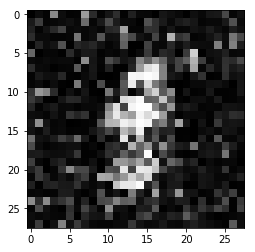

epoch 402 [D:loss 0.62 D:acc 54.69] [G:loss 0.70]
epoch 403 [D:loss 0.62 D:acc 57.81] [G:loss 0.71]
epoch 404 [D:loss 0.64 D:acc 57.81] [G:loss 0.71]
epoch 405 [D:loss 0.64 D:acc 50.00] [G:loss 0.71]
epoch 406 [D:loss 0.65 D:acc 57.81] [G:loss 0.68]
epoch 407 [D:loss 0.62 D:acc 59.38] [G:loss 0.72]
epoch 408 [D:loss 0.65 D:acc 59.38] [G:loss 0.71]
epoch 409 [D:loss 0.64 D:acc 64.06] [G:loss 0.72]
epoch 410 [D:loss 0.64 D:acc 62.50] [G:loss 0.72]
epoch 411 [D:loss 0.63 D:acc 67.19] [G:loss 0.71]
epoch 412 [D:loss 0.63 D:acc 53.12] [G:loss 0.71]
epoch 413 [D:loss 0.63 D:acc 59.38] [G:loss 0.71]
epoch 414 [D:loss 0.63 D:acc 56.25] [G:loss 0.71]
epoch 415 [D:loss 0.65 D:acc 53.12] [G:loss 0.71]
epoch 416 [D:loss 0.63 D:acc 68.75] [G:loss 0.72]
epoch 417 [D:loss 0.66 D:acc 51.56] [G:loss 0.75]
epoch 418 [D:loss 0.66 D:acc 59.38] [G:loss 0.73]
epoch 419 [D:loss 0.64 D:acc 65.62] [G:loss 0.75]
epoch 420 [D:loss 0.66 D:acc 56.25] [G:loss 0.73]
epoch 421 [D:loss 0.67 D:acc 54.69] [G:loss 0.72]


epoch 567 [D:loss 0.67 D:acc 56.25] [G:loss 0.74]
epoch 568 [D:loss 0.63 D:acc 64.06] [G:loss 0.75]
epoch 569 [D:loss 0.65 D:acc 57.81] [G:loss 0.75]
epoch 570 [D:loss 0.63 D:acc 65.62] [G:loss 0.74]
epoch 571 [D:loss 0.64 D:acc 64.06] [G:loss 0.74]
epoch 572 [D:loss 0.61 D:acc 73.44] [G:loss 0.72]
epoch 573 [D:loss 0.62 D:acc 67.19] [G:loss 0.75]
epoch 574 [D:loss 0.65 D:acc 64.06] [G:loss 0.69]
epoch 575 [D:loss 0.67 D:acc 59.38] [G:loss 0.69]
epoch 576 [D:loss 0.65 D:acc 56.25] [G:loss 0.72]
epoch 577 [D:loss 0.65 D:acc 59.38] [G:loss 0.74]
epoch 578 [D:loss 0.65 D:acc 56.25] [G:loss 0.77]
epoch 579 [D:loss 0.63 D:acc 70.31] [G:loss 0.78]
epoch 580 [D:loss 0.65 D:acc 56.25] [G:loss 0.77]
epoch 581 [D:loss 0.62 D:acc 68.75] [G:loss 0.78]
epoch 582 [D:loss 0.64 D:acc 65.62] [G:loss 0.74]
epoch 583 [D:loss 0.66 D:acc 54.69] [G:loss 0.75]
epoch 584 [D:loss 0.67 D:acc 57.81] [G:loss 0.71]
epoch 585 [D:loss 0.64 D:acc 65.62] [G:loss 0.72]
epoch 586 [D:loss 0.64 D:acc 65.62] [G:loss 0.72]


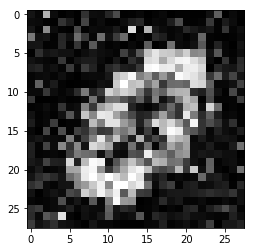

epoch 602 [D:loss 0.62 D:acc 67.19] [G:loss 0.77]
epoch 603 [D:loss 0.63 D:acc 67.19] [G:loss 0.75]
epoch 604 [D:loss 0.63 D:acc 64.06] [G:loss 0.71]
epoch 605 [D:loss 0.64 D:acc 65.62] [G:loss 0.72]
epoch 606 [D:loss 0.61 D:acc 64.06] [G:loss 0.76]
epoch 607 [D:loss 0.63 D:acc 65.62] [G:loss 0.74]
epoch 608 [D:loss 0.63 D:acc 67.19] [G:loss 0.76]
epoch 609 [D:loss 0.65 D:acc 59.38] [G:loss 0.74]
epoch 610 [D:loss 0.63 D:acc 65.62] [G:loss 0.72]
epoch 611 [D:loss 0.65 D:acc 62.50] [G:loss 0.75]
epoch 612 [D:loss 0.65 D:acc 65.62] [G:loss 0.74]
epoch 613 [D:loss 0.64 D:acc 65.62] [G:loss 0.78]
epoch 614 [D:loss 0.65 D:acc 59.38] [G:loss 0.75]
epoch 615 [D:loss 0.64 D:acc 68.75] [G:loss 0.77]
epoch 616 [D:loss 0.64 D:acc 62.50] [G:loss 0.77]
epoch 617 [D:loss 0.66 D:acc 53.12] [G:loss 0.77]
epoch 618 [D:loss 0.63 D:acc 67.19] [G:loss 0.77]
epoch 619 [D:loss 0.66 D:acc 62.50] [G:loss 0.73]
epoch 620 [D:loss 0.61 D:acc 68.75] [G:loss 0.71]
epoch 621 [D:loss 0.63 D:acc 62.50] [G:loss 0.74]


epoch 766 [D:loss 0.65 D:acc 51.56] [G:loss 0.79]
epoch 767 [D:loss 0.62 D:acc 64.06] [G:loss 0.80]
epoch 768 [D:loss 0.61 D:acc 71.88] [G:loss 0.78]
epoch 769 [D:loss 0.65 D:acc 60.94] [G:loss 0.78]
epoch 770 [D:loss 0.64 D:acc 65.62] [G:loss 0.78]
epoch 771 [D:loss 0.62 D:acc 65.62] [G:loss 0.78]
epoch 772 [D:loss 0.65 D:acc 56.25] [G:loss 0.78]
epoch 773 [D:loss 0.63 D:acc 68.75] [G:loss 0.80]
epoch 774 [D:loss 0.62 D:acc 71.88] [G:loss 0.77]
epoch 775 [D:loss 0.67 D:acc 60.94] [G:loss 0.73]
epoch 776 [D:loss 0.59 D:acc 71.88] [G:loss 0.73]
epoch 777 [D:loss 0.62 D:acc 65.62] [G:loss 0.76]
epoch 778 [D:loss 0.65 D:acc 60.94] [G:loss 0.76]
epoch 779 [D:loss 0.65 D:acc 56.25] [G:loss 0.78]
epoch 780 [D:loss 0.63 D:acc 60.94] [G:loss 0.85]
epoch 781 [D:loss 0.67 D:acc 48.44] [G:loss 0.87]
epoch 782 [D:loss 0.65 D:acc 60.94] [G:loss 0.82]
epoch 783 [D:loss 0.63 D:acc 60.94] [G:loss 0.77]
epoch 784 [D:loss 0.64 D:acc 60.94] [G:loss 0.80]
epoch 785 [D:loss 0.60 D:acc 65.62] [G:loss 0.82]


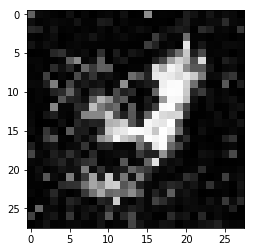

epoch 802 [D:loss 0.66 D:acc 62.50] [G:loss 0.81]
epoch 803 [D:loss 0.67 D:acc 51.56] [G:loss 0.80]
epoch 804 [D:loss 0.65 D:acc 60.94] [G:loss 0.78]
epoch 805 [D:loss 0.62 D:acc 70.31] [G:loss 0.85]
epoch 806 [D:loss 0.61 D:acc 73.44] [G:loss 0.83]
epoch 807 [D:loss 0.60 D:acc 73.44] [G:loss 0.83]
epoch 808 [D:loss 0.64 D:acc 67.19] [G:loss 0.81]
epoch 809 [D:loss 0.62 D:acc 67.19] [G:loss 0.81]
epoch 810 [D:loss 0.59 D:acc 68.75] [G:loss 0.82]
epoch 811 [D:loss 0.61 D:acc 68.75] [G:loss 0.86]
epoch 812 [D:loss 0.61 D:acc 67.19] [G:loss 0.83]
epoch 813 [D:loss 0.60 D:acc 75.00] [G:loss 0.85]
epoch 814 [D:loss 0.62 D:acc 71.88] [G:loss 0.84]
epoch 815 [D:loss 0.61 D:acc 68.75] [G:loss 0.86]
epoch 816 [D:loss 0.62 D:acc 67.19] [G:loss 0.85]
epoch 817 [D:loss 0.64 D:acc 60.94] [G:loss 0.85]
epoch 818 [D:loss 0.62 D:acc 64.06] [G:loss 0.82]
epoch 819 [D:loss 0.64 D:acc 62.50] [G:loss 0.81]
epoch 820 [D:loss 0.61 D:acc 75.00] [G:loss 0.83]
epoch 821 [D:loss 0.60 D:acc 68.75] [G:loss 0.85]


epoch 968 [D:loss 0.61 D:acc 71.88] [G:loss 0.87]
epoch 969 [D:loss 0.60 D:acc 68.75] [G:loss 0.88]
epoch 970 [D:loss 0.64 D:acc 57.81] [G:loss 0.81]
epoch 971 [D:loss 0.61 D:acc 73.44] [G:loss 0.89]
epoch 972 [D:loss 0.59 D:acc 75.00] [G:loss 0.89]
epoch 973 [D:loss 0.57 D:acc 76.56] [G:loss 0.90]
epoch 974 [D:loss 0.60 D:acc 76.56] [G:loss 0.88]
epoch 975 [D:loss 0.63 D:acc 67.19] [G:loss 0.88]
epoch 976 [D:loss 0.59 D:acc 75.00] [G:loss 0.87]
epoch 977 [D:loss 0.60 D:acc 70.31] [G:loss 0.84]
epoch 978 [D:loss 0.64 D:acc 60.94] [G:loss 0.84]
epoch 979 [D:loss 0.62 D:acc 64.06] [G:loss 0.84]
epoch 980 [D:loss 0.58 D:acc 75.00] [G:loss 0.84]
epoch 981 [D:loss 0.65 D:acc 50.00] [G:loss 0.83]
epoch 982 [D:loss 0.60 D:acc 68.75] [G:loss 0.87]
epoch 983 [D:loss 0.62 D:acc 67.19] [G:loss 0.87]
epoch 984 [D:loss 0.63 D:acc 64.06] [G:loss 0.85]
epoch 985 [D:loss 0.61 D:acc 73.44] [G:loss 0.85]
epoch 986 [D:loss 0.63 D:acc 68.75] [G:loss 0.84]
epoch 987 [D:loss 0.60 D:acc 73.44] [G:loss 0.81]


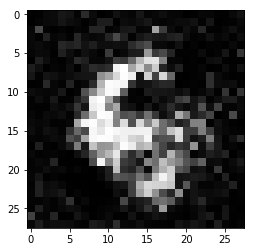

epoch 1002 [D:loss 0.56 D:acc 78.12] [G:loss 0.85]
epoch 1003 [D:loss 0.58 D:acc 75.00] [G:loss 0.85]
epoch 1004 [D:loss 0.58 D:acc 65.62] [G:loss 0.86]
epoch 1005 [D:loss 0.60 D:acc 71.88] [G:loss 0.87]
epoch 1006 [D:loss 0.61 D:acc 62.50] [G:loss 0.86]
epoch 1007 [D:loss 0.57 D:acc 76.56] [G:loss 0.93]
epoch 1008 [D:loss 0.58 D:acc 68.75] [G:loss 0.89]
epoch 1009 [D:loss 0.57 D:acc 68.75] [G:loss 0.92]
epoch 1010 [D:loss 0.59 D:acc 71.88] [G:loss 0.87]
epoch 1011 [D:loss 0.61 D:acc 62.50] [G:loss 0.88]
epoch 1012 [D:loss 0.62 D:acc 64.06] [G:loss 0.86]
epoch 1013 [D:loss 0.59 D:acc 73.44] [G:loss 0.84]
epoch 1014 [D:loss 0.67 D:acc 51.56] [G:loss 0.89]
epoch 1015 [D:loss 0.59 D:acc 68.75] [G:loss 0.86]
epoch 1016 [D:loss 0.60 D:acc 73.44] [G:loss 0.86]
epoch 1017 [D:loss 0.54 D:acc 79.69] [G:loss 0.87]
epoch 1018 [D:loss 0.63 D:acc 54.69] [G:loss 0.88]
epoch 1019 [D:loss 0.59 D:acc 70.31] [G:loss 0.94]
epoch 1020 [D:loss 0.65 D:acc 59.38] [G:loss 0.91]
epoch 1021 [D:loss 0.59 D:acc 7

epoch 1168 [D:loss 0.55 D:acc 85.94] [G:loss 0.88]
epoch 1169 [D:loss 0.63 D:acc 64.06] [G:loss 0.88]
epoch 1170 [D:loss 0.61 D:acc 57.81] [G:loss 0.91]
epoch 1171 [D:loss 0.56 D:acc 75.00] [G:loss 0.90]
epoch 1172 [D:loss 0.56 D:acc 75.00] [G:loss 0.93]
epoch 1173 [D:loss 0.57 D:acc 73.44] [G:loss 0.97]
epoch 1174 [D:loss 0.61 D:acc 62.50] [G:loss 0.89]
epoch 1175 [D:loss 0.57 D:acc 75.00] [G:loss 0.92]
epoch 1176 [D:loss 0.59 D:acc 68.75] [G:loss 0.86]
epoch 1177 [D:loss 0.62 D:acc 57.81] [G:loss 0.84]
epoch 1178 [D:loss 0.56 D:acc 79.69] [G:loss 0.91]
epoch 1179 [D:loss 0.58 D:acc 75.00] [G:loss 0.86]
epoch 1180 [D:loss 0.55 D:acc 78.12] [G:loss 0.89]
epoch 1181 [D:loss 0.59 D:acc 75.00] [G:loss 0.86]
epoch 1182 [D:loss 0.65 D:acc 57.81] [G:loss 0.89]
epoch 1183 [D:loss 0.62 D:acc 67.19] [G:loss 0.91]
epoch 1184 [D:loss 0.55 D:acc 75.00] [G:loss 1.00]
epoch 1185 [D:loss 0.59 D:acc 70.31] [G:loss 0.96]
epoch 1186 [D:loss 0.61 D:acc 67.19] [G:loss 0.94]
epoch 1187 [D:loss 0.60 D:acc 7

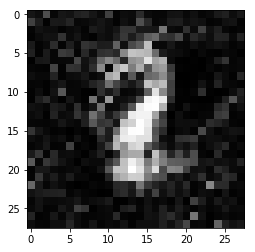

epoch 1202 [D:loss 0.61 D:acc 67.19] [G:loss 0.95]
epoch 1203 [D:loss 0.56 D:acc 78.12] [G:loss 0.98]
epoch 1204 [D:loss 0.62 D:acc 68.75] [G:loss 0.88]
epoch 1205 [D:loss 0.62 D:acc 65.62] [G:loss 0.90]
epoch 1206 [D:loss 0.64 D:acc 65.62] [G:loss 0.91]
epoch 1207 [D:loss 0.58 D:acc 78.12] [G:loss 0.93]
epoch 1208 [D:loss 0.52 D:acc 79.69] [G:loss 0.95]
epoch 1209 [D:loss 0.58 D:acc 75.00] [G:loss 0.89]
epoch 1210 [D:loss 0.56 D:acc 76.56] [G:loss 0.89]
epoch 1211 [D:loss 0.63 D:acc 60.94] [G:loss 0.86]
epoch 1212 [D:loss 0.59 D:acc 70.31] [G:loss 0.85]
epoch 1213 [D:loss 0.60 D:acc 60.94] [G:loss 0.97]
epoch 1214 [D:loss 0.51 D:acc 79.69] [G:loss 1.02]
epoch 1215 [D:loss 0.59 D:acc 73.44] [G:loss 1.00]
epoch 1216 [D:loss 0.65 D:acc 65.62] [G:loss 0.91]
epoch 1217 [D:loss 0.59 D:acc 73.44] [G:loss 0.89]
epoch 1218 [D:loss 0.60 D:acc 70.31] [G:loss 0.87]
epoch 1219 [D:loss 0.59 D:acc 70.31] [G:loss 0.92]
epoch 1220 [D:loss 0.61 D:acc 73.44] [G:loss 0.92]
epoch 1221 [D:loss 0.60 D:acc 7

epoch 1366 [D:loss 0.60 D:acc 73.44] [G:loss 0.92]
epoch 1367 [D:loss 0.61 D:acc 65.62] [G:loss 0.89]
epoch 1368 [D:loss 0.60 D:acc 64.06] [G:loss 0.88]
epoch 1369 [D:loss 0.55 D:acc 82.81] [G:loss 0.99]
epoch 1370 [D:loss 0.53 D:acc 81.25] [G:loss 0.93]
epoch 1371 [D:loss 0.57 D:acc 65.62] [G:loss 0.94]
epoch 1372 [D:loss 0.60 D:acc 65.62] [G:loss 0.92]
epoch 1373 [D:loss 0.62 D:acc 65.62] [G:loss 0.89]
epoch 1374 [D:loss 0.60 D:acc 75.00] [G:loss 0.93]
epoch 1375 [D:loss 0.61 D:acc 64.06] [G:loss 0.93]
epoch 1376 [D:loss 0.61 D:acc 65.62] [G:loss 0.92]
epoch 1377 [D:loss 0.60 D:acc 71.88] [G:loss 0.91]
epoch 1378 [D:loss 0.56 D:acc 71.88] [G:loss 0.91]
epoch 1379 [D:loss 0.60 D:acc 73.44] [G:loss 0.91]
epoch 1380 [D:loss 0.56 D:acc 76.56] [G:loss 0.90]
epoch 1381 [D:loss 0.57 D:acc 70.31] [G:loss 0.97]
epoch 1382 [D:loss 0.60 D:acc 75.00] [G:loss 0.89]
epoch 1383 [D:loss 0.56 D:acc 75.00] [G:loss 0.93]
epoch 1384 [D:loss 0.59 D:acc 65.62] [G:loss 0.88]
epoch 1385 [D:loss 0.58 D:acc 7

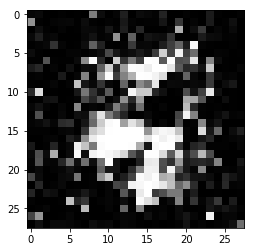

epoch 1402 [D:loss 0.56 D:acc 79.69] [G:loss 0.81]
epoch 1403 [D:loss 0.56 D:acc 71.88] [G:loss 0.96]
epoch 1404 [D:loss 0.63 D:acc 64.06] [G:loss 0.84]
epoch 1405 [D:loss 0.53 D:acc 78.12] [G:loss 0.87]
epoch 1406 [D:loss 0.57 D:acc 78.12] [G:loss 0.90]
epoch 1407 [D:loss 0.61 D:acc 59.38] [G:loss 0.92]
epoch 1408 [D:loss 0.58 D:acc 73.44] [G:loss 0.94]
epoch 1409 [D:loss 0.58 D:acc 75.00] [G:loss 0.91]
epoch 1410 [D:loss 0.55 D:acc 76.56] [G:loss 0.93]
epoch 1411 [D:loss 0.55 D:acc 82.81] [G:loss 0.95]
epoch 1412 [D:loss 0.51 D:acc 78.12] [G:loss 0.95]
epoch 1413 [D:loss 0.56 D:acc 73.44] [G:loss 0.89]
epoch 1414 [D:loss 0.54 D:acc 76.56] [G:loss 0.89]
epoch 1415 [D:loss 0.62 D:acc 60.94] [G:loss 0.88]
epoch 1416 [D:loss 0.58 D:acc 65.62] [G:loss 0.97]
epoch 1417 [D:loss 0.62 D:acc 64.06] [G:loss 0.92]
epoch 1418 [D:loss 0.58 D:acc 71.88] [G:loss 0.97]
epoch 1419 [D:loss 0.57 D:acc 82.81] [G:loss 0.99]
epoch 1420 [D:loss 0.52 D:acc 82.81] [G:loss 0.99]
epoch 1421 [D:loss 0.60 D:acc 7

epoch 1566 [D:loss 0.59 D:acc 71.88] [G:loss 0.91]
epoch 1567 [D:loss 0.52 D:acc 82.81] [G:loss 0.94]
epoch 1568 [D:loss 0.62 D:acc 62.50] [G:loss 0.95]
epoch 1569 [D:loss 0.55 D:acc 82.81] [G:loss 0.95]
epoch 1570 [D:loss 0.63 D:acc 65.62] [G:loss 0.92]
epoch 1571 [D:loss 0.59 D:acc 70.31] [G:loss 0.94]
epoch 1572 [D:loss 0.53 D:acc 76.56] [G:loss 0.88]
epoch 1573 [D:loss 0.52 D:acc 81.25] [G:loss 0.91]
epoch 1574 [D:loss 0.56 D:acc 76.56] [G:loss 0.95]
epoch 1575 [D:loss 0.61 D:acc 73.44] [G:loss 0.92]
epoch 1576 [D:loss 0.59 D:acc 68.75] [G:loss 0.90]
epoch 1577 [D:loss 0.53 D:acc 71.88] [G:loss 0.91]
epoch 1578 [D:loss 0.62 D:acc 59.38] [G:loss 0.98]
epoch 1579 [D:loss 0.62 D:acc 70.31] [G:loss 0.97]
epoch 1580 [D:loss 0.61 D:acc 67.19] [G:loss 0.99]
epoch 1581 [D:loss 0.62 D:acc 68.75] [G:loss 0.85]
epoch 1582 [D:loss 0.56 D:acc 68.75] [G:loss 0.97]
epoch 1583 [D:loss 0.60 D:acc 65.62] [G:loss 0.91]
epoch 1584 [D:loss 0.54 D:acc 81.25] [G:loss 0.93]
epoch 1585 [D:loss 0.61 D:acc 6

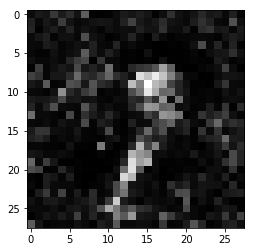

epoch 1602 [D:loss 0.67 D:acc 60.94] [G:loss 0.95]
epoch 1603 [D:loss 0.57 D:acc 76.56] [G:loss 0.85]
epoch 1604 [D:loss 0.58 D:acc 68.75] [G:loss 0.89]
epoch 1605 [D:loss 0.58 D:acc 70.31] [G:loss 0.89]
epoch 1606 [D:loss 0.61 D:acc 60.94] [G:loss 0.90]
epoch 1607 [D:loss 0.64 D:acc 65.62] [G:loss 0.85]
epoch 1608 [D:loss 0.58 D:acc 70.31] [G:loss 0.90]
epoch 1609 [D:loss 0.58 D:acc 71.88] [G:loss 1.03]
epoch 1610 [D:loss 0.55 D:acc 68.75] [G:loss 1.00]
epoch 1611 [D:loss 0.61 D:acc 73.44] [G:loss 1.06]
epoch 1612 [D:loss 0.59 D:acc 76.56] [G:loss 0.98]
epoch 1613 [D:loss 0.58 D:acc 73.44] [G:loss 0.89]
epoch 1614 [D:loss 0.62 D:acc 68.75] [G:loss 0.91]
epoch 1615 [D:loss 0.55 D:acc 76.56] [G:loss 0.95]
epoch 1616 [D:loss 0.61 D:acc 65.62] [G:loss 0.96]
epoch 1617 [D:loss 0.60 D:acc 67.19] [G:loss 0.91]
epoch 1618 [D:loss 0.56 D:acc 75.00] [G:loss 0.97]
epoch 1619 [D:loss 0.57 D:acc 68.75] [G:loss 0.95]
epoch 1620 [D:loss 0.56 D:acc 76.56] [G:loss 0.99]
epoch 1621 [D:loss 0.60 D:acc 6

epoch 1767 [D:loss 0.63 D:acc 62.50] [G:loss 0.90]
epoch 1768 [D:loss 0.58 D:acc 68.75] [G:loss 0.93]
epoch 1769 [D:loss 0.58 D:acc 68.75] [G:loss 0.94]
epoch 1770 [D:loss 0.58 D:acc 73.44] [G:loss 0.89]
epoch 1771 [D:loss 0.62 D:acc 65.62] [G:loss 0.87]
epoch 1772 [D:loss 0.56 D:acc 79.69] [G:loss 0.94]
epoch 1773 [D:loss 0.60 D:acc 70.31] [G:loss 0.92]
epoch 1774 [D:loss 0.60 D:acc 65.62] [G:loss 0.89]
epoch 1775 [D:loss 0.66 D:acc 64.06] [G:loss 0.91]
epoch 1776 [D:loss 0.58 D:acc 71.88] [G:loss 0.94]
epoch 1777 [D:loss 0.57 D:acc 70.31] [G:loss 1.03]
epoch 1778 [D:loss 0.64 D:acc 67.19] [G:loss 1.00]
epoch 1779 [D:loss 0.58 D:acc 70.31] [G:loss 0.90]
epoch 1780 [D:loss 0.54 D:acc 82.81] [G:loss 0.92]
epoch 1781 [D:loss 0.58 D:acc 71.88] [G:loss 0.89]
epoch 1782 [D:loss 0.61 D:acc 64.06] [G:loss 0.96]
epoch 1783 [D:loss 0.55 D:acc 71.88] [G:loss 0.95]
epoch 1784 [D:loss 0.55 D:acc 76.56] [G:loss 0.96]
epoch 1785 [D:loss 0.57 D:acc 71.88] [G:loss 0.99]
epoch 1786 [D:loss 0.53 D:acc 7

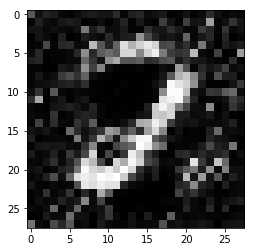

epoch 1802 [D:loss 0.56 D:acc 78.12] [G:loss 0.99]
epoch 1803 [D:loss 0.52 D:acc 81.25] [G:loss 0.95]
epoch 1804 [D:loss 0.60 D:acc 64.06] [G:loss 0.96]
epoch 1805 [D:loss 0.56 D:acc 67.19] [G:loss 0.91]
epoch 1806 [D:loss 0.56 D:acc 73.44] [G:loss 0.93]
epoch 1807 [D:loss 0.61 D:acc 67.19] [G:loss 0.96]
epoch 1808 [D:loss 0.60 D:acc 67.19] [G:loss 1.00]
epoch 1809 [D:loss 0.60 D:acc 67.19] [G:loss 0.95]
epoch 1810 [D:loss 0.59 D:acc 73.44] [G:loss 0.95]
epoch 1811 [D:loss 0.52 D:acc 79.69] [G:loss 0.93]
epoch 1812 [D:loss 0.64 D:acc 65.62] [G:loss 0.95]
epoch 1813 [D:loss 0.61 D:acc 68.75] [G:loss 1.04]
epoch 1814 [D:loss 0.57 D:acc 78.12] [G:loss 1.01]
epoch 1815 [D:loss 0.56 D:acc 65.62] [G:loss 1.03]
epoch 1816 [D:loss 0.62 D:acc 62.50] [G:loss 0.98]
epoch 1817 [D:loss 0.53 D:acc 78.12] [G:loss 1.03]
epoch 1818 [D:loss 0.59 D:acc 71.88] [G:loss 1.02]
epoch 1819 [D:loss 0.57 D:acc 73.44] [G:loss 0.98]
epoch 1820 [D:loss 0.67 D:acc 51.56] [G:loss 0.93]
epoch 1821 [D:loss 0.57 D:acc 7

epoch 1968 [D:loss 0.63 D:acc 64.06] [G:loss 1.01]
epoch 1969 [D:loss 0.64 D:acc 65.62] [G:loss 0.89]
epoch 1970 [D:loss 0.61 D:acc 65.62] [G:loss 0.89]
epoch 1971 [D:loss 0.61 D:acc 64.06] [G:loss 0.94]
epoch 1972 [D:loss 0.57 D:acc 76.56] [G:loss 0.97]
epoch 1973 [D:loss 0.54 D:acc 73.44] [G:loss 0.95]
epoch 1974 [D:loss 0.58 D:acc 70.31] [G:loss 0.97]
epoch 1975 [D:loss 0.57 D:acc 75.00] [G:loss 1.01]
epoch 1976 [D:loss 0.63 D:acc 62.50] [G:loss 0.95]
epoch 1977 [D:loss 0.58 D:acc 75.00] [G:loss 0.93]
epoch 1978 [D:loss 0.55 D:acc 75.00] [G:loss 1.04]
epoch 1979 [D:loss 0.59 D:acc 68.75] [G:loss 1.02]
epoch 1980 [D:loss 0.58 D:acc 68.75] [G:loss 0.91]
epoch 1981 [D:loss 0.52 D:acc 82.81] [G:loss 0.94]
epoch 1982 [D:loss 0.67 D:acc 68.75] [G:loss 0.92]
epoch 1983 [D:loss 0.53 D:acc 76.56] [G:loss 0.98]
epoch 1984 [D:loss 0.53 D:acc 79.69] [G:loss 1.01]
epoch 1985 [D:loss 0.59 D:acc 64.06] [G:loss 0.97]
epoch 1986 [D:loss 0.60 D:acc 65.62] [G:loss 0.97]
epoch 1987 [D:loss 0.55 D:acc 8

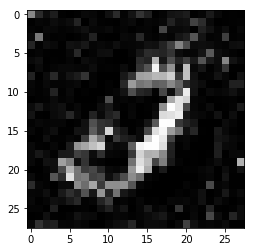

epoch 2002 [D:loss 0.57 D:acc 75.00] [G:loss 0.99]
epoch 2003 [D:loss 0.56 D:acc 73.44] [G:loss 0.94]
epoch 2004 [D:loss 0.59 D:acc 75.00] [G:loss 1.03]
epoch 2005 [D:loss 0.59 D:acc 70.31] [G:loss 0.95]
epoch 2006 [D:loss 0.51 D:acc 81.25] [G:loss 0.89]
epoch 2007 [D:loss 0.60 D:acc 64.06] [G:loss 0.94]
epoch 2008 [D:loss 0.58 D:acc 70.31] [G:loss 0.89]
epoch 2009 [D:loss 0.62 D:acc 59.38] [G:loss 0.93]
epoch 2010 [D:loss 0.57 D:acc 76.56] [G:loss 1.05]
epoch 2011 [D:loss 0.63 D:acc 70.31] [G:loss 0.97]
epoch 2012 [D:loss 0.55 D:acc 79.69] [G:loss 1.03]
epoch 2013 [D:loss 0.59 D:acc 65.62] [G:loss 0.96]
epoch 2014 [D:loss 0.56 D:acc 78.12] [G:loss 0.94]
epoch 2015 [D:loss 0.61 D:acc 64.06] [G:loss 0.98]
epoch 2016 [D:loss 0.69 D:acc 59.38] [G:loss 0.92]
epoch 2017 [D:loss 0.56 D:acc 73.44] [G:loss 1.01]
epoch 2018 [D:loss 0.60 D:acc 68.75] [G:loss 0.99]
epoch 2019 [D:loss 0.68 D:acc 54.69] [G:loss 0.94]
epoch 2020 [D:loss 0.56 D:acc 78.12] [G:loss 1.06]
epoch 2021 [D:loss 0.59 D:acc 6

epoch 2164 [D:loss 0.61 D:acc 67.19] [G:loss 0.98]
epoch 2165 [D:loss 0.64 D:acc 65.62] [G:loss 0.96]
epoch 2166 [D:loss 0.60 D:acc 71.88] [G:loss 1.03]
epoch 2167 [D:loss 0.62 D:acc 64.06] [G:loss 0.94]
epoch 2168 [D:loss 0.59 D:acc 76.56] [G:loss 0.98]
epoch 2169 [D:loss 0.65 D:acc 60.94] [G:loss 0.94]
epoch 2170 [D:loss 0.60 D:acc 70.31] [G:loss 0.91]
epoch 2171 [D:loss 0.62 D:acc 60.94] [G:loss 0.82]
epoch 2172 [D:loss 0.53 D:acc 81.25] [G:loss 0.92]
epoch 2173 [D:loss 0.58 D:acc 67.19] [G:loss 0.94]
epoch 2174 [D:loss 0.57 D:acc 70.31] [G:loss 0.93]
epoch 2175 [D:loss 0.61 D:acc 64.06] [G:loss 0.96]
epoch 2176 [D:loss 0.52 D:acc 79.69] [G:loss 1.00]
epoch 2177 [D:loss 0.54 D:acc 75.00] [G:loss 1.03]
epoch 2178 [D:loss 0.53 D:acc 81.25] [G:loss 1.00]
epoch 2179 [D:loss 0.58 D:acc 73.44] [G:loss 1.01]
epoch 2180 [D:loss 0.49 D:acc 85.94] [G:loss 1.08]
epoch 2181 [D:loss 0.59 D:acc 68.75] [G:loss 0.99]
epoch 2182 [D:loss 0.54 D:acc 78.12] [G:loss 0.97]
epoch 2183 [D:loss 0.66 D:acc 6

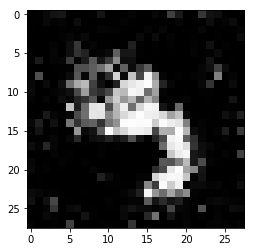

epoch 2202 [D:loss 0.52 D:acc 75.00] [G:loss 1.05]
epoch 2203 [D:loss 0.58 D:acc 73.44] [G:loss 1.00]
epoch 2204 [D:loss 0.56 D:acc 65.62] [G:loss 0.97]
epoch 2205 [D:loss 0.60 D:acc 68.75] [G:loss 1.00]
epoch 2206 [D:loss 0.60 D:acc 71.88] [G:loss 0.95]
epoch 2207 [D:loss 0.57 D:acc 76.56] [G:loss 0.93]
epoch 2208 [D:loss 0.54 D:acc 79.69] [G:loss 0.89]
epoch 2209 [D:loss 0.57 D:acc 71.88] [G:loss 0.93]
epoch 2210 [D:loss 0.57 D:acc 71.88] [G:loss 0.91]
epoch 2211 [D:loss 0.56 D:acc 78.12] [G:loss 0.95]
epoch 2212 [D:loss 0.63 D:acc 68.75] [G:loss 1.05]
epoch 2213 [D:loss 0.53 D:acc 73.44] [G:loss 1.02]
epoch 2214 [D:loss 0.59 D:acc 70.31] [G:loss 0.91]
epoch 2215 [D:loss 0.63 D:acc 62.50] [G:loss 0.96]
epoch 2216 [D:loss 0.59 D:acc 71.88] [G:loss 0.94]
epoch 2217 [D:loss 0.55 D:acc 78.12] [G:loss 0.94]
epoch 2218 [D:loss 0.57 D:acc 68.75] [G:loss 0.98]
epoch 2219 [D:loss 0.65 D:acc 57.81] [G:loss 0.92]
epoch 2220 [D:loss 0.65 D:acc 57.81] [G:loss 0.97]
epoch 2221 [D:loss 0.58 D:acc 7

epoch 2364 [D:loss 0.59 D:acc 68.75] [G:loss 1.06]
epoch 2365 [D:loss 0.59 D:acc 65.62] [G:loss 0.99]
epoch 2366 [D:loss 0.61 D:acc 62.50] [G:loss 0.97]
epoch 2367 [D:loss 0.66 D:acc 57.81] [G:loss 0.95]
epoch 2368 [D:loss 0.57 D:acc 70.31] [G:loss 0.98]
epoch 2369 [D:loss 0.55 D:acc 79.69] [G:loss 1.04]
epoch 2370 [D:loss 0.61 D:acc 65.62] [G:loss 0.92]
epoch 2371 [D:loss 0.68 D:acc 60.94] [G:loss 0.92]
epoch 2372 [D:loss 0.60 D:acc 71.88] [G:loss 1.02]
epoch 2373 [D:loss 0.59 D:acc 71.88] [G:loss 1.05]
epoch 2374 [D:loss 0.58 D:acc 71.88] [G:loss 0.98]
epoch 2375 [D:loss 0.62 D:acc 65.62] [G:loss 0.95]
epoch 2376 [D:loss 0.67 D:acc 60.94] [G:loss 0.96]
epoch 2377 [D:loss 0.60 D:acc 70.31] [G:loss 0.87]
epoch 2378 [D:loss 0.58 D:acc 73.44] [G:loss 0.95]
epoch 2379 [D:loss 0.59 D:acc 71.88] [G:loss 0.95]
epoch 2380 [D:loss 0.63 D:acc 62.50] [G:loss 0.90]
epoch 2381 [D:loss 0.54 D:acc 78.12] [G:loss 0.91]
epoch 2382 [D:loss 0.62 D:acc 64.06] [G:loss 0.93]
epoch 2383 [D:loss 0.53 D:acc 7

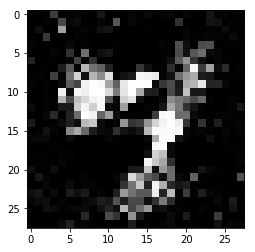

epoch 2402 [D:loss 0.55 D:acc 70.31] [G:loss 0.92]
epoch 2403 [D:loss 0.61 D:acc 62.50] [G:loss 0.92]
epoch 2404 [D:loss 0.61 D:acc 64.06] [G:loss 1.00]
epoch 2405 [D:loss 0.56 D:acc 75.00] [G:loss 0.95]
epoch 2406 [D:loss 0.65 D:acc 56.25] [G:loss 0.97]
epoch 2407 [D:loss 0.65 D:acc 67.19] [G:loss 0.92]
epoch 2408 [D:loss 0.61 D:acc 67.19] [G:loss 0.88]
epoch 2409 [D:loss 0.58 D:acc 68.75] [G:loss 0.98]
epoch 2410 [D:loss 0.60 D:acc 68.75] [G:loss 0.98]
epoch 2411 [D:loss 0.56 D:acc 71.88] [G:loss 0.93]
epoch 2412 [D:loss 0.57 D:acc 67.19] [G:loss 0.99]
epoch 2413 [D:loss 0.63 D:acc 60.94] [G:loss 0.97]
epoch 2414 [D:loss 0.63 D:acc 70.31] [G:loss 0.94]
epoch 2415 [D:loss 0.59 D:acc 62.50] [G:loss 0.99]
epoch 2416 [D:loss 0.62 D:acc 68.75] [G:loss 1.04]
epoch 2417 [D:loss 0.57 D:acc 71.88] [G:loss 0.99]
epoch 2418 [D:loss 0.56 D:acc 70.31] [G:loss 1.02]
epoch 2419 [D:loss 0.58 D:acc 73.44] [G:loss 1.03]
epoch 2420 [D:loss 0.55 D:acc 78.12] [G:loss 1.02]
epoch 2421 [D:loss 0.56 D:acc 7

epoch 2564 [D:loss 0.60 D:acc 62.50] [G:loss 1.00]
epoch 2565 [D:loss 0.66 D:acc 60.94] [G:loss 1.03]
epoch 2566 [D:loss 0.60 D:acc 71.88] [G:loss 1.07]
epoch 2567 [D:loss 0.61 D:acc 68.75] [G:loss 0.98]
epoch 2568 [D:loss 0.56 D:acc 76.56] [G:loss 0.97]
epoch 2569 [D:loss 0.56 D:acc 76.56] [G:loss 1.01]
epoch 2570 [D:loss 0.61 D:acc 64.06] [G:loss 0.98]
epoch 2571 [D:loss 0.54 D:acc 82.81] [G:loss 0.86]
epoch 2572 [D:loss 0.57 D:acc 70.31] [G:loss 0.99]
epoch 2573 [D:loss 0.57 D:acc 65.62] [G:loss 1.04]
epoch 2574 [D:loss 0.59 D:acc 65.62] [G:loss 1.10]
epoch 2575 [D:loss 0.57 D:acc 73.44] [G:loss 0.99]
epoch 2576 [D:loss 0.69 D:acc 54.69] [G:loss 1.11]
epoch 2577 [D:loss 0.55 D:acc 71.88] [G:loss 1.00]
epoch 2578 [D:loss 0.59 D:acc 78.12] [G:loss 0.98]
epoch 2579 [D:loss 0.67 D:acc 53.12] [G:loss 0.97]
epoch 2580 [D:loss 0.56 D:acc 79.69] [G:loss 0.99]
epoch 2581 [D:loss 0.56 D:acc 84.38] [G:loss 0.94]
epoch 2582 [D:loss 0.54 D:acc 79.69] [G:loss 1.01]
epoch 2583 [D:loss 0.57 D:acc 7

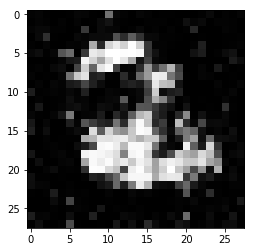

epoch 2602 [D:loss 0.57 D:acc 73.44] [G:loss 0.93]
epoch 2603 [D:loss 0.56 D:acc 75.00] [G:loss 0.83]
epoch 2604 [D:loss 0.60 D:acc 62.50] [G:loss 0.90]
epoch 2605 [D:loss 0.55 D:acc 76.56] [G:loss 1.05]
epoch 2606 [D:loss 0.60 D:acc 76.56] [G:loss 0.89]
epoch 2607 [D:loss 0.60 D:acc 64.06] [G:loss 0.98]
epoch 2608 [D:loss 0.61 D:acc 68.75] [G:loss 0.96]
epoch 2609 [D:loss 0.59 D:acc 71.88] [G:loss 0.95]
epoch 2610 [D:loss 0.58 D:acc 73.44] [G:loss 0.99]
epoch 2611 [D:loss 0.56 D:acc 70.31] [G:loss 0.97]
epoch 2612 [D:loss 0.56 D:acc 76.56] [G:loss 0.91]
epoch 2613 [D:loss 0.56 D:acc 68.75] [G:loss 0.82]
epoch 2614 [D:loss 0.59 D:acc 73.44] [G:loss 0.97]
epoch 2615 [D:loss 0.64 D:acc 62.50] [G:loss 0.95]
epoch 2616 [D:loss 0.65 D:acc 65.62] [G:loss 0.96]
epoch 2617 [D:loss 0.67 D:acc 64.06] [G:loss 1.00]
epoch 2618 [D:loss 0.59 D:acc 71.88] [G:loss 1.00]
epoch 2619 [D:loss 0.58 D:acc 70.31] [G:loss 0.92]
epoch 2620 [D:loss 0.61 D:acc 67.19] [G:loss 0.90]
epoch 2621 [D:loss 0.56 D:acc 7

epoch 2764 [D:loss 0.62 D:acc 62.50] [G:loss 0.97]
epoch 2765 [D:loss 0.65 D:acc 62.50] [G:loss 0.94]
epoch 2766 [D:loss 0.55 D:acc 75.00] [G:loss 0.97]
epoch 2767 [D:loss 0.58 D:acc 70.31] [G:loss 1.01]
epoch 2768 [D:loss 0.65 D:acc 56.25] [G:loss 0.92]
epoch 2769 [D:loss 0.57 D:acc 73.44] [G:loss 0.94]
epoch 2770 [D:loss 0.52 D:acc 76.56] [G:loss 0.99]
epoch 2771 [D:loss 0.64 D:acc 62.50] [G:loss 0.97]
epoch 2772 [D:loss 0.61 D:acc 65.62] [G:loss 0.95]
epoch 2773 [D:loss 0.55 D:acc 78.12] [G:loss 1.02]
epoch 2774 [D:loss 0.57 D:acc 68.75] [G:loss 0.92]
epoch 2775 [D:loss 0.63 D:acc 67.19] [G:loss 0.95]
epoch 2776 [D:loss 0.61 D:acc 65.62] [G:loss 1.03]
epoch 2777 [D:loss 0.57 D:acc 71.88] [G:loss 0.94]
epoch 2778 [D:loss 0.57 D:acc 78.12] [G:loss 0.93]
epoch 2779 [D:loss 0.64 D:acc 68.75] [G:loss 1.01]
epoch 2780 [D:loss 0.64 D:acc 62.50] [G:loss 0.98]
epoch 2781 [D:loss 0.56 D:acc 68.75] [G:loss 1.07]
epoch 2782 [D:loss 0.62 D:acc 57.81] [G:loss 0.97]
epoch 2783 [D:loss 0.63 D:acc 5

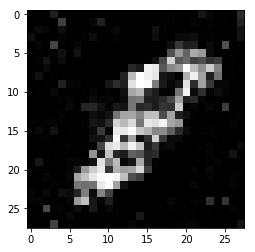

epoch 2802 [D:loss 0.59 D:acc 68.75] [G:loss 1.01]
epoch 2803 [D:loss 0.54 D:acc 71.88] [G:loss 0.97]
epoch 2804 [D:loss 0.61 D:acc 64.06] [G:loss 0.95]
epoch 2805 [D:loss 0.60 D:acc 60.94] [G:loss 0.92]
epoch 2806 [D:loss 0.61 D:acc 65.62] [G:loss 0.94]
epoch 2807 [D:loss 0.59 D:acc 67.19] [G:loss 0.89]
epoch 2808 [D:loss 0.57 D:acc 75.00] [G:loss 1.03]
epoch 2809 [D:loss 0.58 D:acc 75.00] [G:loss 0.93]
epoch 2810 [D:loss 0.56 D:acc 81.25] [G:loss 1.05]
epoch 2811 [D:loss 0.56 D:acc 76.56] [G:loss 1.02]
epoch 2812 [D:loss 0.57 D:acc 68.75] [G:loss 1.01]
epoch 2813 [D:loss 0.63 D:acc 62.50] [G:loss 1.05]
epoch 2814 [D:loss 0.63 D:acc 62.50] [G:loss 1.04]
epoch 2815 [D:loss 0.57 D:acc 65.62] [G:loss 1.01]
epoch 2816 [D:loss 0.60 D:acc 67.19] [G:loss 1.02]
epoch 2817 [D:loss 0.55 D:acc 71.88] [G:loss 1.08]
epoch 2818 [D:loss 0.59 D:acc 76.56] [G:loss 0.95]
epoch 2819 [D:loss 0.60 D:acc 70.31] [G:loss 0.95]
epoch 2820 [D:loss 0.52 D:acc 79.69] [G:loss 0.98]
epoch 2821 [D:loss 0.58 D:acc 6

epoch 2964 [D:loss 0.55 D:acc 71.88] [G:loss 0.97]
epoch 2965 [D:loss 0.52 D:acc 76.56] [G:loss 0.90]
epoch 2966 [D:loss 0.58 D:acc 70.31] [G:loss 0.92]
epoch 2967 [D:loss 0.57 D:acc 65.62] [G:loss 0.95]
epoch 2968 [D:loss 0.49 D:acc 79.69] [G:loss 1.03]
epoch 2969 [D:loss 0.59 D:acc 62.50] [G:loss 0.95]
epoch 2970 [D:loss 0.64 D:acc 65.62] [G:loss 0.97]
epoch 2971 [D:loss 0.58 D:acc 73.44] [G:loss 0.92]
epoch 2972 [D:loss 0.65 D:acc 64.06] [G:loss 0.97]
epoch 2973 [D:loss 0.69 D:acc 54.69] [G:loss 0.93]
epoch 2974 [D:loss 0.58 D:acc 68.75] [G:loss 1.04]
epoch 2975 [D:loss 0.63 D:acc 64.06] [G:loss 1.04]
epoch 2976 [D:loss 0.61 D:acc 67.19] [G:loss 1.00]
epoch 2977 [D:loss 0.56 D:acc 75.00] [G:loss 0.98]
epoch 2978 [D:loss 0.64 D:acc 62.50] [G:loss 1.05]
epoch 2979 [D:loss 0.61 D:acc 65.62] [G:loss 1.02]
epoch 2980 [D:loss 0.55 D:acc 71.88] [G:loss 0.98]
epoch 2981 [D:loss 0.60 D:acc 75.00] [G:loss 1.03]
epoch 2982 [D:loss 0.57 D:acc 70.31] [G:loss 1.05]
epoch 2983 [D:loss 0.55 D:acc 8

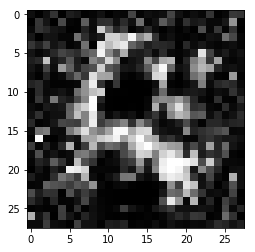

epoch 3002 [D:loss 0.56 D:acc 65.62] [G:loss 1.00]
epoch 3003 [D:loss 0.63 D:acc 62.50] [G:loss 1.15]
epoch 3004 [D:loss 0.65 D:acc 67.19] [G:loss 1.01]
epoch 3005 [D:loss 0.58 D:acc 71.88] [G:loss 1.01]
epoch 3006 [D:loss 0.57 D:acc 75.00] [G:loss 0.98]
epoch 3007 [D:loss 0.59 D:acc 70.31] [G:loss 1.00]
epoch 3008 [D:loss 0.55 D:acc 70.31] [G:loss 1.03]
epoch 3009 [D:loss 0.60 D:acc 60.94] [G:loss 0.95]
epoch 3010 [D:loss 0.63 D:acc 60.94] [G:loss 1.08]
epoch 3011 [D:loss 0.64 D:acc 64.06] [G:loss 1.02]
epoch 3012 [D:loss 0.65 D:acc 60.94] [G:loss 1.00]
epoch 3013 [D:loss 0.69 D:acc 53.12] [G:loss 0.97]
epoch 3014 [D:loss 0.57 D:acc 70.31] [G:loss 0.95]
epoch 3015 [D:loss 0.56 D:acc 70.31] [G:loss 0.98]
epoch 3016 [D:loss 0.63 D:acc 68.75] [G:loss 0.92]
epoch 3017 [D:loss 0.59 D:acc 71.88] [G:loss 0.91]
epoch 3018 [D:loss 0.62 D:acc 67.19] [G:loss 0.93]
epoch 3019 [D:loss 0.59 D:acc 68.75] [G:loss 0.97]
epoch 3020 [D:loss 0.61 D:acc 65.62] [G:loss 1.01]
epoch 3021 [D:loss 0.52 D:acc 8

epoch 3164 [D:loss 0.55 D:acc 76.56] [G:loss 0.98]
epoch 3165 [D:loss 0.65 D:acc 68.75] [G:loss 0.96]
epoch 3166 [D:loss 0.59 D:acc 71.88] [G:loss 1.05]
epoch 3167 [D:loss 0.58 D:acc 67.19] [G:loss 1.00]
epoch 3168 [D:loss 0.51 D:acc 78.12] [G:loss 0.97]
epoch 3169 [D:loss 0.64 D:acc 70.31] [G:loss 0.91]
epoch 3170 [D:loss 0.52 D:acc 79.69] [G:loss 0.96]
epoch 3171 [D:loss 0.55 D:acc 73.44] [G:loss 0.91]
epoch 3172 [D:loss 0.58 D:acc 68.75] [G:loss 1.01]
epoch 3173 [D:loss 0.60 D:acc 71.88] [G:loss 1.05]
epoch 3174 [D:loss 0.56 D:acc 64.06] [G:loss 0.93]
epoch 3175 [D:loss 0.60 D:acc 79.69] [G:loss 1.03]
epoch 3176 [D:loss 0.54 D:acc 85.94] [G:loss 1.05]
epoch 3177 [D:loss 0.55 D:acc 82.81] [G:loss 1.12]
epoch 3178 [D:loss 0.63 D:acc 65.62] [G:loss 0.95]
epoch 3179 [D:loss 0.58 D:acc 73.44] [G:loss 1.03]
epoch 3180 [D:loss 0.57 D:acc 67.19] [G:loss 0.98]
epoch 3181 [D:loss 0.60 D:acc 62.50] [G:loss 1.07]
epoch 3182 [D:loss 0.48 D:acc 82.81] [G:loss 1.00]
epoch 3183 [D:loss 0.62 D:acc 7

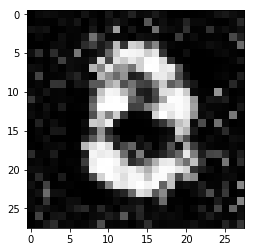

epoch 3202 [D:loss 0.65 D:acc 60.94] [G:loss 0.94]
epoch 3203 [D:loss 0.59 D:acc 68.75] [G:loss 0.97]
epoch 3204 [D:loss 0.60 D:acc 64.06] [G:loss 1.04]
epoch 3205 [D:loss 0.65 D:acc 64.06] [G:loss 1.08]
epoch 3206 [D:loss 0.58 D:acc 67.19] [G:loss 1.09]
epoch 3207 [D:loss 0.59 D:acc 67.19] [G:loss 1.03]
epoch 3208 [D:loss 0.59 D:acc 68.75] [G:loss 0.97]
epoch 3209 [D:loss 0.60 D:acc 65.62] [G:loss 0.96]
epoch 3210 [D:loss 0.61 D:acc 62.50] [G:loss 0.94]
epoch 3211 [D:loss 0.60 D:acc 70.31] [G:loss 1.05]
epoch 3212 [D:loss 0.52 D:acc 82.81] [G:loss 0.97]
epoch 3213 [D:loss 0.59 D:acc 64.06] [G:loss 0.98]
epoch 3214 [D:loss 0.64 D:acc 62.50] [G:loss 0.97]
epoch 3215 [D:loss 0.58 D:acc 67.19] [G:loss 0.96]
epoch 3216 [D:loss 0.70 D:acc 56.25] [G:loss 1.03]
epoch 3217 [D:loss 0.59 D:acc 70.31] [G:loss 1.01]
epoch 3218 [D:loss 0.58 D:acc 73.44] [G:loss 1.01]
epoch 3219 [D:loss 0.60 D:acc 67.19] [G:loss 0.98]
epoch 3220 [D:loss 0.51 D:acc 78.12] [G:loss 0.96]
epoch 3221 [D:loss 0.55 D:acc 7

epoch 3364 [D:loss 0.61 D:acc 70.31] [G:loss 1.00]
epoch 3365 [D:loss 0.61 D:acc 67.19] [G:loss 1.07]
epoch 3366 [D:loss 0.62 D:acc 64.06] [G:loss 1.09]
epoch 3367 [D:loss 0.57 D:acc 73.44] [G:loss 1.05]
epoch 3368 [D:loss 0.63 D:acc 67.19] [G:loss 0.93]
epoch 3369 [D:loss 0.56 D:acc 76.56] [G:loss 0.99]
epoch 3370 [D:loss 0.57 D:acc 71.88] [G:loss 0.98]
epoch 3371 [D:loss 0.59 D:acc 64.06] [G:loss 1.04]
epoch 3372 [D:loss 0.55 D:acc 70.31] [G:loss 0.99]
epoch 3373 [D:loss 0.63 D:acc 62.50] [G:loss 1.07]
epoch 3374 [D:loss 0.59 D:acc 78.12] [G:loss 0.97]
epoch 3375 [D:loss 0.58 D:acc 71.88] [G:loss 0.97]
epoch 3376 [D:loss 0.55 D:acc 75.00] [G:loss 0.99]
epoch 3377 [D:loss 0.60 D:acc 68.75] [G:loss 0.93]
epoch 3378 [D:loss 0.57 D:acc 79.69] [G:loss 0.98]
epoch 3379 [D:loss 0.55 D:acc 71.88] [G:loss 0.94]
epoch 3380 [D:loss 0.62 D:acc 65.62] [G:loss 1.15]
epoch 3381 [D:loss 0.59 D:acc 70.31] [G:loss 1.07]
epoch 3382 [D:loss 0.63 D:acc 62.50] [G:loss 1.01]
epoch 3383 [D:loss 0.60 D:acc 6

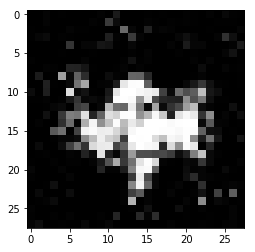

epoch 3402 [D:loss 0.65 D:acc 65.62] [G:loss 1.14]
epoch 3403 [D:loss 0.64 D:acc 62.50] [G:loss 0.98]
epoch 3404 [D:loss 0.69 D:acc 51.56] [G:loss 0.99]
epoch 3405 [D:loss 0.61 D:acc 65.62] [G:loss 0.99]
epoch 3406 [D:loss 0.58 D:acc 65.62] [G:loss 0.96]
epoch 3407 [D:loss 0.54 D:acc 75.00] [G:loss 0.90]
epoch 3408 [D:loss 0.55 D:acc 82.81] [G:loss 0.98]
epoch 3409 [D:loss 0.62 D:acc 67.19] [G:loss 0.97]
epoch 3410 [D:loss 0.55 D:acc 70.31] [G:loss 1.10]
epoch 3411 [D:loss 0.61 D:acc 70.31] [G:loss 0.97]
epoch 3412 [D:loss 0.57 D:acc 70.31] [G:loss 0.91]
epoch 3413 [D:loss 0.57 D:acc 71.88] [G:loss 0.97]
epoch 3414 [D:loss 0.59 D:acc 67.19] [G:loss 1.04]
epoch 3415 [D:loss 0.63 D:acc 70.31] [G:loss 1.01]
epoch 3416 [D:loss 0.60 D:acc 67.19] [G:loss 0.98]
epoch 3417 [D:loss 0.62 D:acc 70.31] [G:loss 0.91]
epoch 3418 [D:loss 0.61 D:acc 65.62] [G:loss 1.06]
epoch 3419 [D:loss 0.62 D:acc 70.31] [G:loss 1.05]
epoch 3420 [D:loss 0.55 D:acc 71.88] [G:loss 1.04]
epoch 3421 [D:loss 0.64 D:acc 6

epoch 3564 [D:loss 0.55 D:acc 76.56] [G:loss 1.01]
epoch 3565 [D:loss 0.61 D:acc 65.62] [G:loss 1.06]
epoch 3566 [D:loss 0.57 D:acc 73.44] [G:loss 0.98]
epoch 3567 [D:loss 0.58 D:acc 76.56] [G:loss 0.93]
epoch 3568 [D:loss 0.57 D:acc 68.75] [G:loss 0.91]
epoch 3569 [D:loss 0.57 D:acc 75.00] [G:loss 1.04]
epoch 3570 [D:loss 0.51 D:acc 78.12] [G:loss 1.03]
epoch 3571 [D:loss 0.57 D:acc 68.75] [G:loss 0.95]
epoch 3572 [D:loss 0.57 D:acc 70.31] [G:loss 0.93]
epoch 3573 [D:loss 0.56 D:acc 73.44] [G:loss 0.94]
epoch 3574 [D:loss 0.57 D:acc 60.94] [G:loss 0.96]
epoch 3575 [D:loss 0.57 D:acc 71.88] [G:loss 1.09]
epoch 3576 [D:loss 0.56 D:acc 70.31] [G:loss 0.97]
epoch 3577 [D:loss 0.61 D:acc 65.62] [G:loss 1.01]
epoch 3578 [D:loss 0.56 D:acc 73.44] [G:loss 1.02]
epoch 3579 [D:loss 0.68 D:acc 57.81] [G:loss 1.01]
epoch 3580 [D:loss 0.59 D:acc 62.50] [G:loss 0.90]
epoch 3581 [D:loss 0.62 D:acc 67.19] [G:loss 1.03]
epoch 3582 [D:loss 0.67 D:acc 57.81] [G:loss 1.09]
epoch 3583 [D:loss 0.66 D:acc 5

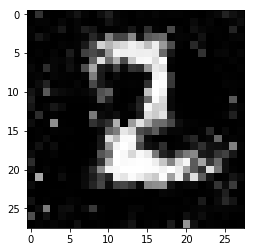

epoch 3602 [D:loss 0.57 D:acc 78.12] [G:loss 0.97]
epoch 3603 [D:loss 0.57 D:acc 73.44] [G:loss 0.96]
epoch 3604 [D:loss 0.62 D:acc 59.38] [G:loss 0.94]
epoch 3605 [D:loss 0.62 D:acc 65.62] [G:loss 1.04]
epoch 3606 [D:loss 0.58 D:acc 67.19] [G:loss 1.02]
epoch 3607 [D:loss 0.58 D:acc 71.88] [G:loss 0.97]
epoch 3608 [D:loss 0.53 D:acc 70.31] [G:loss 0.99]
epoch 3609 [D:loss 0.65 D:acc 60.94] [G:loss 0.96]
epoch 3610 [D:loss 0.61 D:acc 62.50] [G:loss 1.00]
epoch 3611 [D:loss 0.60 D:acc 68.75] [G:loss 1.11]
epoch 3612 [D:loss 0.59 D:acc 65.62] [G:loss 1.04]
epoch 3613 [D:loss 0.54 D:acc 70.31] [G:loss 1.08]
epoch 3614 [D:loss 0.57 D:acc 68.75] [G:loss 1.04]
epoch 3615 [D:loss 0.54 D:acc 76.56] [G:loss 1.18]
epoch 3616 [D:loss 0.52 D:acc 76.56] [G:loss 1.03]
epoch 3617 [D:loss 0.62 D:acc 67.19] [G:loss 0.90]
epoch 3618 [D:loss 0.73 D:acc 54.69] [G:loss 0.98]
epoch 3619 [D:loss 0.62 D:acc 64.06] [G:loss 0.86]
epoch 3620 [D:loss 0.62 D:acc 68.75] [G:loss 1.10]
epoch 3621 [D:loss 0.57 D:acc 7

epoch 3764 [D:loss 0.59 D:acc 73.44] [G:loss 0.96]
epoch 3765 [D:loss 0.54 D:acc 78.12] [G:loss 0.99]
epoch 3766 [D:loss 0.55 D:acc 78.12] [G:loss 1.00]
epoch 3767 [D:loss 0.59 D:acc 68.75] [G:loss 0.99]
epoch 3768 [D:loss 0.57 D:acc 70.31] [G:loss 0.99]
epoch 3769 [D:loss 0.56 D:acc 71.88] [G:loss 1.00]
epoch 3770 [D:loss 0.59 D:acc 73.44] [G:loss 0.92]
epoch 3771 [D:loss 0.55 D:acc 76.56] [G:loss 1.01]
epoch 3772 [D:loss 0.62 D:acc 64.06] [G:loss 0.92]
epoch 3773 [D:loss 0.55 D:acc 73.44] [G:loss 1.04]
epoch 3774 [D:loss 0.61 D:acc 70.31] [G:loss 0.98]
epoch 3775 [D:loss 0.66 D:acc 62.50] [G:loss 0.98]
epoch 3776 [D:loss 0.58 D:acc 73.44] [G:loss 0.99]
epoch 3777 [D:loss 0.61 D:acc 71.88] [G:loss 0.97]
epoch 3778 [D:loss 0.60 D:acc 73.44] [G:loss 1.00]
epoch 3779 [D:loss 0.64 D:acc 60.94] [G:loss 1.05]
epoch 3780 [D:loss 0.57 D:acc 71.88] [G:loss 1.06]
epoch 3781 [D:loss 0.57 D:acc 67.19] [G:loss 1.03]
epoch 3782 [D:loss 0.61 D:acc 64.06] [G:loss 0.97]
epoch 3783 [D:loss 0.66 D:acc 6

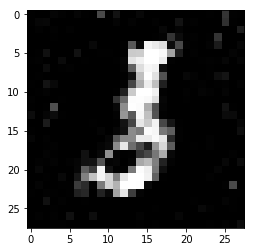

epoch 3802 [D:loss 0.62 D:acc 62.50] [G:loss 1.04]
epoch 3803 [D:loss 0.65 D:acc 57.81] [G:loss 0.94]
epoch 3804 [D:loss 0.62 D:acc 64.06] [G:loss 1.04]
epoch 3805 [D:loss 0.61 D:acc 70.31] [G:loss 1.00]
epoch 3806 [D:loss 0.50 D:acc 81.25] [G:loss 1.04]
epoch 3807 [D:loss 0.65 D:acc 64.06] [G:loss 1.11]
epoch 3808 [D:loss 0.67 D:acc 60.94] [G:loss 0.97]
epoch 3809 [D:loss 0.60 D:acc 70.31] [G:loss 1.00]
epoch 3810 [D:loss 0.61 D:acc 67.19] [G:loss 1.05]
epoch 3811 [D:loss 0.64 D:acc 62.50] [G:loss 1.04]
epoch 3812 [D:loss 0.60 D:acc 70.31] [G:loss 1.08]
epoch 3813 [D:loss 0.63 D:acc 62.50] [G:loss 1.07]
epoch 3814 [D:loss 0.54 D:acc 82.81] [G:loss 0.86]
epoch 3815 [D:loss 0.54 D:acc 79.69] [G:loss 1.02]
epoch 3816 [D:loss 0.61 D:acc 71.88] [G:loss 1.13]
epoch 3817 [D:loss 0.61 D:acc 60.94] [G:loss 0.98]
epoch 3818 [D:loss 0.59 D:acc 73.44] [G:loss 0.86]
epoch 3819 [D:loss 0.56 D:acc 71.88] [G:loss 0.93]
epoch 3820 [D:loss 0.55 D:acc 73.44] [G:loss 1.05]
epoch 3821 [D:loss 0.58 D:acc 6

epoch 3967 [D:loss 0.60 D:acc 68.75] [G:loss 1.02]
epoch 3968 [D:loss 0.54 D:acc 75.00] [G:loss 0.95]
epoch 3969 [D:loss 0.58 D:acc 68.75] [G:loss 0.95]
epoch 3970 [D:loss 0.66 D:acc 56.25] [G:loss 0.97]
epoch 3971 [D:loss 0.64 D:acc 57.81] [G:loss 1.03]
epoch 3972 [D:loss 0.62 D:acc 65.62] [G:loss 1.03]
epoch 3973 [D:loss 0.54 D:acc 76.56] [G:loss 1.01]
epoch 3974 [D:loss 0.60 D:acc 73.44] [G:loss 1.10]
epoch 3975 [D:loss 0.59 D:acc 75.00] [G:loss 0.98]
epoch 3976 [D:loss 0.59 D:acc 60.94] [G:loss 1.05]
epoch 3977 [D:loss 0.52 D:acc 79.69] [G:loss 1.00]
epoch 3978 [D:loss 0.61 D:acc 64.06] [G:loss 1.07]
epoch 3979 [D:loss 0.58 D:acc 68.75] [G:loss 1.02]
epoch 3980 [D:loss 0.62 D:acc 64.06] [G:loss 1.10]
epoch 3981 [D:loss 0.57 D:acc 75.00] [G:loss 1.00]
epoch 3982 [D:loss 0.62 D:acc 65.62] [G:loss 0.92]
epoch 3983 [D:loss 0.55 D:acc 76.56] [G:loss 0.95]
epoch 3984 [D:loss 0.65 D:acc 62.50] [G:loss 0.93]
epoch 3985 [D:loss 0.62 D:acc 64.06] [G:loss 0.93]
epoch 3986 [D:loss 0.64 D:acc 6

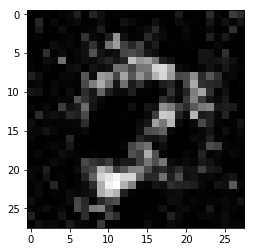

epoch 4002 [D:loss 0.61 D:acc 70.31] [G:loss 0.98]
epoch 4003 [D:loss 0.64 D:acc 59.38] [G:loss 0.89]
epoch 4004 [D:loss 0.66 D:acc 62.50] [G:loss 1.11]
epoch 4005 [D:loss 0.60 D:acc 65.62] [G:loss 1.02]
epoch 4006 [D:loss 0.55 D:acc 75.00] [G:loss 1.07]
epoch 4007 [D:loss 0.62 D:acc 68.75] [G:loss 0.99]
epoch 4008 [D:loss 0.64 D:acc 65.62] [G:loss 1.13]
epoch 4009 [D:loss 0.65 D:acc 65.62] [G:loss 1.03]
epoch 4010 [D:loss 0.59 D:acc 65.62] [G:loss 1.08]
epoch 4011 [D:loss 0.62 D:acc 62.50] [G:loss 0.95]
epoch 4012 [D:loss 0.57 D:acc 67.19] [G:loss 1.00]
epoch 4013 [D:loss 0.62 D:acc 68.75] [G:loss 1.04]
epoch 4014 [D:loss 0.57 D:acc 75.00] [G:loss 1.01]
epoch 4015 [D:loss 0.61 D:acc 65.62] [G:loss 0.99]
epoch 4016 [D:loss 0.65 D:acc 62.50] [G:loss 1.08]
epoch 4017 [D:loss 0.56 D:acc 73.44] [G:loss 1.04]
epoch 4018 [D:loss 0.59 D:acc 68.75] [G:loss 0.93]
epoch 4019 [D:loss 0.54 D:acc 71.88] [G:loss 0.98]
epoch 4020 [D:loss 0.56 D:acc 78.12] [G:loss 1.00]
epoch 4021 [D:loss 0.54 D:acc 7

epoch 4165 [D:loss 0.62 D:acc 70.31] [G:loss 0.92]
epoch 4166 [D:loss 0.63 D:acc 76.56] [G:loss 0.90]
epoch 4167 [D:loss 0.64 D:acc 65.62] [G:loss 1.08]
epoch 4168 [D:loss 0.62 D:acc 67.19] [G:loss 1.02]
epoch 4169 [D:loss 0.51 D:acc 71.88] [G:loss 1.02]
epoch 4170 [D:loss 0.58 D:acc 64.06] [G:loss 1.00]
epoch 4171 [D:loss 0.63 D:acc 67.19] [G:loss 1.08]
epoch 4172 [D:loss 0.59 D:acc 71.88] [G:loss 0.93]
epoch 4173 [D:loss 0.66 D:acc 67.19] [G:loss 1.01]
epoch 4174 [D:loss 0.57 D:acc 78.12] [G:loss 1.04]
epoch 4175 [D:loss 0.60 D:acc 65.62] [G:loss 0.95]
epoch 4176 [D:loss 0.61 D:acc 65.62] [G:loss 0.99]
epoch 4177 [D:loss 0.59 D:acc 71.88] [G:loss 1.05]
epoch 4178 [D:loss 0.61 D:acc 68.75] [G:loss 1.03]
epoch 4179 [D:loss 0.59 D:acc 70.31] [G:loss 1.08]
epoch 4180 [D:loss 0.63 D:acc 65.62] [G:loss 1.06]
epoch 4181 [D:loss 0.58 D:acc 71.88] [G:loss 0.92]
epoch 4182 [D:loss 0.56 D:acc 75.00] [G:loss 0.94]
epoch 4183 [D:loss 0.58 D:acc 70.31] [G:loss 0.98]
epoch 4184 [D:loss 0.70 D:acc 5

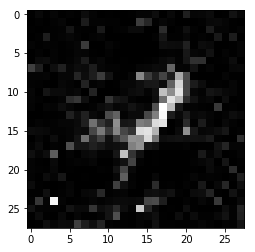

epoch 4202 [D:loss 0.63 D:acc 56.25] [G:loss 1.03]
epoch 4203 [D:loss 0.58 D:acc 71.88] [G:loss 1.01]
epoch 4204 [D:loss 0.59 D:acc 73.44] [G:loss 0.97]
epoch 4205 [D:loss 0.66 D:acc 64.06] [G:loss 0.97]
epoch 4206 [D:loss 0.53 D:acc 79.69] [G:loss 0.96]
epoch 4207 [D:loss 0.58 D:acc 68.75] [G:loss 0.94]
epoch 4208 [D:loss 0.61 D:acc 67.19] [G:loss 1.00]
epoch 4209 [D:loss 0.64 D:acc 65.62] [G:loss 0.94]
epoch 4210 [D:loss 0.67 D:acc 60.94] [G:loss 0.99]
epoch 4211 [D:loss 0.62 D:acc 64.06] [G:loss 0.83]
epoch 4212 [D:loss 0.64 D:acc 62.50] [G:loss 0.97]
epoch 4213 [D:loss 0.62 D:acc 62.50] [G:loss 1.01]
epoch 4214 [D:loss 0.62 D:acc 70.31] [G:loss 1.10]
epoch 4215 [D:loss 0.59 D:acc 67.19] [G:loss 1.10]
epoch 4216 [D:loss 0.63 D:acc 62.50] [G:loss 0.97]
epoch 4217 [D:loss 0.69 D:acc 57.81] [G:loss 0.96]
epoch 4218 [D:loss 0.59 D:acc 73.44] [G:loss 1.07]
epoch 4219 [D:loss 0.58 D:acc 73.44] [G:loss 1.07]
epoch 4220 [D:loss 0.65 D:acc 65.62] [G:loss 1.04]
epoch 4221 [D:loss 0.64 D:acc 6

epoch 4364 [D:loss 0.61 D:acc 57.81] [G:loss 0.98]
epoch 4365 [D:loss 0.59 D:acc 68.75] [G:loss 0.93]
epoch 4366 [D:loss 0.59 D:acc 67.19] [G:loss 0.96]
epoch 4367 [D:loss 0.61 D:acc 64.06] [G:loss 1.04]
epoch 4368 [D:loss 0.58 D:acc 65.62] [G:loss 1.15]
epoch 4369 [D:loss 0.61 D:acc 68.75] [G:loss 0.94]
epoch 4370 [D:loss 0.62 D:acc 65.62] [G:loss 0.99]
epoch 4371 [D:loss 0.58 D:acc 60.94] [G:loss 1.09]
epoch 4372 [D:loss 0.65 D:acc 51.56] [G:loss 1.05]
epoch 4373 [D:loss 0.69 D:acc 56.25] [G:loss 1.00]
epoch 4374 [D:loss 0.58 D:acc 70.31] [G:loss 1.06]
epoch 4375 [D:loss 0.59 D:acc 67.19] [G:loss 1.09]
epoch 4376 [D:loss 0.59 D:acc 71.88] [G:loss 0.96]
epoch 4377 [D:loss 0.69 D:acc 64.06] [G:loss 0.97]
epoch 4378 [D:loss 0.63 D:acc 67.19] [G:loss 0.88]
epoch 4379 [D:loss 0.60 D:acc 65.62] [G:loss 1.08]
epoch 4380 [D:loss 0.62 D:acc 67.19] [G:loss 1.08]
epoch 4381 [D:loss 0.60 D:acc 70.31] [G:loss 0.99]
epoch 4382 [D:loss 0.71 D:acc 57.81] [G:loss 1.01]
epoch 4383 [D:loss 0.59 D:acc 6

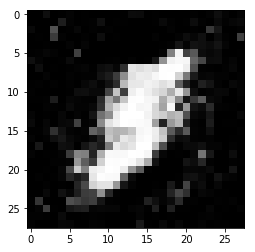

epoch 4402 [D:loss 0.61 D:acc 65.62] [G:loss 1.02]
epoch 4403 [D:loss 0.61 D:acc 64.06] [G:loss 0.93]
epoch 4404 [D:loss 0.60 D:acc 65.62] [G:loss 0.96]
epoch 4405 [D:loss 0.57 D:acc 71.88] [G:loss 0.92]
epoch 4406 [D:loss 0.62 D:acc 62.50] [G:loss 1.02]
epoch 4407 [D:loss 0.59 D:acc 70.31] [G:loss 0.94]
epoch 4408 [D:loss 0.64 D:acc 65.62] [G:loss 0.92]
epoch 4409 [D:loss 0.61 D:acc 67.19] [G:loss 0.93]
epoch 4410 [D:loss 0.58 D:acc 64.06] [G:loss 0.97]
epoch 4411 [D:loss 0.69 D:acc 60.94] [G:loss 1.06]
epoch 4412 [D:loss 0.59 D:acc 73.44] [G:loss 0.95]
epoch 4413 [D:loss 0.63 D:acc 64.06] [G:loss 0.95]
epoch 4414 [D:loss 0.57 D:acc 70.31] [G:loss 0.92]
epoch 4415 [D:loss 0.56 D:acc 76.56] [G:loss 0.94]
epoch 4416 [D:loss 0.58 D:acc 75.00] [G:loss 1.10]
epoch 4417 [D:loss 0.61 D:acc 62.50] [G:loss 0.97]
epoch 4418 [D:loss 0.61 D:acc 64.06] [G:loss 0.96]
epoch 4419 [D:loss 0.58 D:acc 71.88] [G:loss 1.07]
epoch 4420 [D:loss 0.59 D:acc 68.75] [G:loss 1.02]
epoch 4421 [D:loss 0.66 D:acc 5

epoch 4564 [D:loss 0.61 D:acc 68.75] [G:loss 0.94]
epoch 4565 [D:loss 0.67 D:acc 53.12] [G:loss 0.97]
epoch 4566 [D:loss 0.60 D:acc 68.75] [G:loss 0.98]
epoch 4567 [D:loss 0.60 D:acc 68.75] [G:loss 1.02]
epoch 4568 [D:loss 0.52 D:acc 78.12] [G:loss 1.08]
epoch 4569 [D:loss 0.53 D:acc 76.56] [G:loss 1.07]
epoch 4570 [D:loss 0.64 D:acc 65.62] [G:loss 1.02]
epoch 4571 [D:loss 0.66 D:acc 59.38] [G:loss 1.01]
epoch 4572 [D:loss 0.61 D:acc 65.62] [G:loss 1.03]
epoch 4573 [D:loss 0.61 D:acc 68.75] [G:loss 0.95]
epoch 4574 [D:loss 0.67 D:acc 64.06] [G:loss 0.97]
epoch 4575 [D:loss 0.52 D:acc 82.81] [G:loss 1.01]
epoch 4576 [D:loss 0.55 D:acc 78.12] [G:loss 0.98]
epoch 4577 [D:loss 0.63 D:acc 62.50] [G:loss 0.91]
epoch 4578 [D:loss 0.60 D:acc 68.75] [G:loss 1.02]
epoch 4579 [D:loss 0.63 D:acc 65.62] [G:loss 0.96]
epoch 4580 [D:loss 0.61 D:acc 68.75] [G:loss 0.89]
epoch 4581 [D:loss 0.63 D:acc 59.38] [G:loss 1.10]
epoch 4582 [D:loss 0.60 D:acc 67.19] [G:loss 0.96]
epoch 4583 [D:loss 0.58 D:acc 6

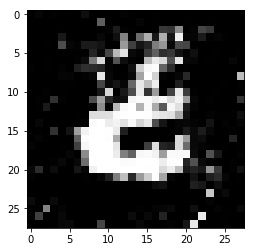

epoch 4602 [D:loss 0.57 D:acc 73.44] [G:loss 1.08]
epoch 4603 [D:loss 0.61 D:acc 65.62] [G:loss 1.02]
epoch 4604 [D:loss 0.56 D:acc 71.88] [G:loss 0.97]
epoch 4605 [D:loss 0.62 D:acc 70.31] [G:loss 0.94]
epoch 4606 [D:loss 0.62 D:acc 64.06] [G:loss 1.00]
epoch 4607 [D:loss 0.53 D:acc 82.81] [G:loss 1.03]
epoch 4608 [D:loss 0.58 D:acc 67.19] [G:loss 0.95]
epoch 4609 [D:loss 0.56 D:acc 70.31] [G:loss 0.98]
epoch 4610 [D:loss 0.61 D:acc 68.75] [G:loss 0.97]
epoch 4611 [D:loss 0.57 D:acc 70.31] [G:loss 1.05]
epoch 4612 [D:loss 0.58 D:acc 70.31] [G:loss 0.97]
epoch 4613 [D:loss 0.66 D:acc 65.62] [G:loss 0.91]
epoch 4614 [D:loss 0.58 D:acc 70.31] [G:loss 0.85]
epoch 4615 [D:loss 0.59 D:acc 70.31] [G:loss 0.84]
epoch 4616 [D:loss 0.59 D:acc 71.88] [G:loss 0.97]
epoch 4617 [D:loss 0.71 D:acc 53.12] [G:loss 1.01]
epoch 4618 [D:loss 0.63 D:acc 64.06] [G:loss 1.10]
epoch 4619 [D:loss 0.69 D:acc 56.25] [G:loss 1.06]
epoch 4620 [D:loss 0.54 D:acc 71.88] [G:loss 1.02]
epoch 4621 [D:loss 0.60 D:acc 6

epoch 4765 [D:loss 0.66 D:acc 59.38] [G:loss 1.00]
epoch 4766 [D:loss 0.56 D:acc 75.00] [G:loss 0.98]
epoch 4767 [D:loss 0.70 D:acc 57.81] [G:loss 1.07]
epoch 4768 [D:loss 0.62 D:acc 71.88] [G:loss 1.04]
epoch 4769 [D:loss 0.64 D:acc 60.94] [G:loss 1.00]
epoch 4770 [D:loss 0.61 D:acc 62.50] [G:loss 0.99]
epoch 4771 [D:loss 0.61 D:acc 60.94] [G:loss 0.95]
epoch 4772 [D:loss 0.63 D:acc 62.50] [G:loss 1.01]
epoch 4773 [D:loss 0.56 D:acc 76.56] [G:loss 0.96]
epoch 4774 [D:loss 0.65 D:acc 56.25] [G:loss 1.03]
epoch 4775 [D:loss 0.62 D:acc 64.06] [G:loss 0.90]
epoch 4776 [D:loss 0.61 D:acc 67.19] [G:loss 1.00]
epoch 4777 [D:loss 0.57 D:acc 71.88] [G:loss 1.10]
epoch 4778 [D:loss 0.60 D:acc 70.31] [G:loss 1.04]
epoch 4779 [D:loss 0.60 D:acc 67.19] [G:loss 1.07]
epoch 4780 [D:loss 0.57 D:acc 73.44] [G:loss 1.12]
epoch 4781 [D:loss 0.60 D:acc 70.31] [G:loss 1.00]
epoch 4782 [D:loss 0.64 D:acc 54.69] [G:loss 1.01]
epoch 4783 [D:loss 0.62 D:acc 64.06] [G:loss 0.94]
epoch 4784 [D:loss 0.62 D:acc 5

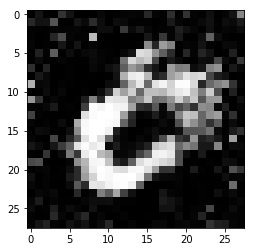

epoch 4802 [D:loss 0.65 D:acc 62.50] [G:loss 0.98]
epoch 4803 [D:loss 0.61 D:acc 70.31] [G:loss 0.97]
epoch 4804 [D:loss 0.57 D:acc 76.56] [G:loss 0.98]
epoch 4805 [D:loss 0.60 D:acc 73.44] [G:loss 0.85]
epoch 4806 [D:loss 0.59 D:acc 64.06] [G:loss 0.92]
epoch 4807 [D:loss 0.60 D:acc 73.44] [G:loss 1.06]
epoch 4808 [D:loss 0.57 D:acc 73.44] [G:loss 1.01]
epoch 4809 [D:loss 0.61 D:acc 65.62] [G:loss 0.87]
epoch 4810 [D:loss 0.64 D:acc 68.75] [G:loss 0.90]
epoch 4811 [D:loss 0.72 D:acc 42.19] [G:loss 1.02]
epoch 4812 [D:loss 0.63 D:acc 70.31] [G:loss 0.89]
epoch 4813 [D:loss 0.62 D:acc 65.62] [G:loss 1.00]
epoch 4814 [D:loss 0.66 D:acc 64.06] [G:loss 0.91]
epoch 4815 [D:loss 0.60 D:acc 68.75] [G:loss 1.00]
epoch 4816 [D:loss 0.64 D:acc 60.94] [G:loss 0.98]
epoch 4817 [D:loss 0.65 D:acc 62.50] [G:loss 1.07]
epoch 4818 [D:loss 0.59 D:acc 71.88] [G:loss 0.98]
epoch 4819 [D:loss 0.64 D:acc 57.81] [G:loss 1.01]
epoch 4820 [D:loss 0.68 D:acc 56.25] [G:loss 0.96]
epoch 4821 [D:loss 0.62 D:acc 6

epoch 4968 [D:loss 0.62 D:acc 68.75] [G:loss 0.98]
epoch 4969 [D:loss 0.62 D:acc 67.19] [G:loss 0.98]
epoch 4970 [D:loss 0.67 D:acc 62.50] [G:loss 0.98]
epoch 4971 [D:loss 0.56 D:acc 73.44] [G:loss 0.97]
epoch 4972 [D:loss 0.65 D:acc 68.75] [G:loss 0.94]
epoch 4973 [D:loss 0.57 D:acc 71.88] [G:loss 1.04]
epoch 4974 [D:loss 0.59 D:acc 70.31] [G:loss 1.03]
epoch 4975 [D:loss 0.62 D:acc 65.62] [G:loss 0.93]
epoch 4976 [D:loss 0.62 D:acc 70.31] [G:loss 0.95]
epoch 4977 [D:loss 0.60 D:acc 65.62] [G:loss 0.94]
epoch 4978 [D:loss 0.59 D:acc 75.00] [G:loss 1.07]
epoch 4979 [D:loss 0.58 D:acc 76.56] [G:loss 0.86]
epoch 4980 [D:loss 0.59 D:acc 68.75] [G:loss 0.97]
epoch 4981 [D:loss 0.54 D:acc 76.56] [G:loss 0.92]
epoch 4982 [D:loss 0.62 D:acc 70.31] [G:loss 0.92]
epoch 4983 [D:loss 0.62 D:acc 62.50] [G:loss 1.03]
epoch 4984 [D:loss 0.75 D:acc 51.56] [G:loss 1.02]
epoch 4985 [D:loss 0.66 D:acc 60.94] [G:loss 0.98]
epoch 4986 [D:loss 0.54 D:acc 75.00] [G:loss 0.97]
epoch 4987 [D:loss 0.58 D:acc 6

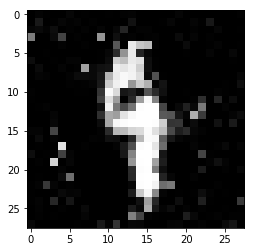

epoch 5002 [D:loss 0.62 D:acc 56.25] [G:loss 0.93]
epoch 5003 [D:loss 0.55 D:acc 71.88] [G:loss 1.08]
epoch 5004 [D:loss 0.61 D:acc 73.44] [G:loss 1.09]
epoch 5005 [D:loss 0.59 D:acc 64.06] [G:loss 1.10]
epoch 5006 [D:loss 0.63 D:acc 56.25] [G:loss 1.13]
epoch 5007 [D:loss 0.57 D:acc 71.88] [G:loss 1.05]
epoch 5008 [D:loss 0.67 D:acc 70.31] [G:loss 1.07]
epoch 5009 [D:loss 0.65 D:acc 65.62] [G:loss 1.05]
epoch 5010 [D:loss 0.59 D:acc 67.19] [G:loss 0.93]
epoch 5011 [D:loss 0.65 D:acc 62.50] [G:loss 1.09]
epoch 5012 [D:loss 0.69 D:acc 60.94] [G:loss 0.99]
epoch 5013 [D:loss 0.66 D:acc 59.38] [G:loss 0.90]
epoch 5014 [D:loss 0.57 D:acc 71.88] [G:loss 0.85]
epoch 5015 [D:loss 0.64 D:acc 54.69] [G:loss 1.00]
epoch 5016 [D:loss 0.64 D:acc 62.50] [G:loss 1.02]
epoch 5017 [D:loss 0.67 D:acc 64.06] [G:loss 1.00]
epoch 5018 [D:loss 0.68 D:acc 56.25] [G:loss 0.95]
epoch 5019 [D:loss 0.58 D:acc 65.62] [G:loss 0.87]
epoch 5020 [D:loss 0.69 D:acc 60.94] [G:loss 1.03]
epoch 5021 [D:loss 0.65 D:acc 5

epoch 5167 [D:loss 0.58 D:acc 70.31] [G:loss 0.94]
epoch 5168 [D:loss 0.68 D:acc 56.25] [G:loss 0.96]
epoch 5169 [D:loss 0.60 D:acc 60.94] [G:loss 1.03]
epoch 5170 [D:loss 0.61 D:acc 68.75] [G:loss 0.95]
epoch 5171 [D:loss 0.55 D:acc 76.56] [G:loss 1.00]
epoch 5172 [D:loss 0.63 D:acc 67.19] [G:loss 1.01]
epoch 5173 [D:loss 0.59 D:acc 60.94] [G:loss 0.90]
epoch 5174 [D:loss 0.61 D:acc 73.44] [G:loss 1.10]
epoch 5175 [D:loss 0.62 D:acc 70.31] [G:loss 1.02]
epoch 5176 [D:loss 0.55 D:acc 79.69] [G:loss 1.01]
epoch 5177 [D:loss 0.56 D:acc 79.69] [G:loss 1.12]
epoch 5178 [D:loss 0.68 D:acc 51.56] [G:loss 0.97]
epoch 5179 [D:loss 0.63 D:acc 65.62] [G:loss 0.98]
epoch 5180 [D:loss 0.64 D:acc 62.50] [G:loss 1.00]
epoch 5181 [D:loss 0.58 D:acc 71.88] [G:loss 1.08]
epoch 5182 [D:loss 0.61 D:acc 64.06] [G:loss 0.97]
epoch 5183 [D:loss 0.60 D:acc 71.88] [G:loss 1.06]
epoch 5184 [D:loss 0.67 D:acc 62.50] [G:loss 0.93]
epoch 5185 [D:loss 0.70 D:acc 50.00] [G:loss 0.93]
epoch 5186 [D:loss 0.56 D:acc 7

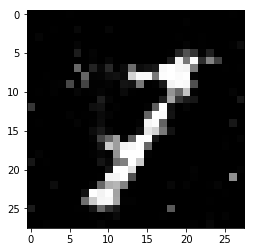

epoch 5202 [D:loss 0.61 D:acc 71.88] [G:loss 0.96]
epoch 5203 [D:loss 0.60 D:acc 76.56] [G:loss 1.00]
epoch 5204 [D:loss 0.59 D:acc 65.62] [G:loss 0.95]
epoch 5205 [D:loss 0.63 D:acc 65.62] [G:loss 1.00]
epoch 5206 [D:loss 0.58 D:acc 70.31] [G:loss 1.02]
epoch 5207 [D:loss 0.69 D:acc 57.81] [G:loss 1.02]
epoch 5208 [D:loss 0.60 D:acc 70.31] [G:loss 1.02]
epoch 5209 [D:loss 0.53 D:acc 78.12] [G:loss 0.97]
epoch 5210 [D:loss 0.63 D:acc 70.31] [G:loss 1.00]
epoch 5211 [D:loss 0.59 D:acc 76.56] [G:loss 1.02]
epoch 5212 [D:loss 0.70 D:acc 64.06] [G:loss 0.99]
epoch 5213 [D:loss 0.55 D:acc 71.88] [G:loss 1.02]
epoch 5214 [D:loss 0.59 D:acc 70.31] [G:loss 1.00]
epoch 5215 [D:loss 0.58 D:acc 71.88] [G:loss 0.90]
epoch 5216 [D:loss 0.59 D:acc 73.44] [G:loss 1.06]
epoch 5217 [D:loss 0.51 D:acc 79.69] [G:loss 1.11]
epoch 5218 [D:loss 0.57 D:acc 73.44] [G:loss 1.06]
epoch 5219 [D:loss 0.64 D:acc 60.94] [G:loss 0.94]
epoch 5220 [D:loss 0.68 D:acc 57.81] [G:loss 0.95]
epoch 5221 [D:loss 0.61 D:acc 6

epoch 5364 [D:loss 0.61 D:acc 67.19] [G:loss 0.98]
epoch 5365 [D:loss 0.59 D:acc 73.44] [G:loss 1.00]
epoch 5366 [D:loss 0.54 D:acc 78.12] [G:loss 1.05]
epoch 5367 [D:loss 0.54 D:acc 73.44] [G:loss 0.92]
epoch 5368 [D:loss 0.61 D:acc 62.50] [G:loss 1.00]
epoch 5369 [D:loss 0.65 D:acc 57.81] [G:loss 0.85]
epoch 5370 [D:loss 0.60 D:acc 71.88] [G:loss 1.08]
epoch 5371 [D:loss 0.55 D:acc 71.88] [G:loss 1.02]
epoch 5372 [D:loss 0.69 D:acc 60.94] [G:loss 1.09]
epoch 5373 [D:loss 0.58 D:acc 68.75] [G:loss 1.13]
epoch 5374 [D:loss 0.64 D:acc 67.19] [G:loss 1.12]
epoch 5375 [D:loss 0.64 D:acc 57.81] [G:loss 1.02]
epoch 5376 [D:loss 0.64 D:acc 59.38] [G:loss 1.03]
epoch 5377 [D:loss 0.66 D:acc 60.94] [G:loss 1.10]
epoch 5378 [D:loss 0.66 D:acc 60.94] [G:loss 0.87]
epoch 5379 [D:loss 0.57 D:acc 75.00] [G:loss 1.03]
epoch 5380 [D:loss 0.68 D:acc 54.69] [G:loss 0.91]
epoch 5381 [D:loss 0.57 D:acc 78.12] [G:loss 0.95]
epoch 5382 [D:loss 0.66 D:acc 64.06] [G:loss 1.11]
epoch 5383 [D:loss 0.63 D:acc 6

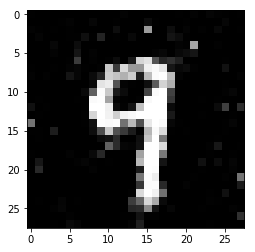

epoch 5402 [D:loss 0.64 D:acc 62.50] [G:loss 1.02]
epoch 5403 [D:loss 0.66 D:acc 60.94] [G:loss 1.04]
epoch 5404 [D:loss 0.64 D:acc 64.06] [G:loss 0.96]
epoch 5405 [D:loss 0.66 D:acc 59.38] [G:loss 1.11]
epoch 5406 [D:loss 0.62 D:acc 62.50] [G:loss 0.96]
epoch 5407 [D:loss 0.62 D:acc 70.31] [G:loss 1.00]
epoch 5408 [D:loss 0.67 D:acc 60.94] [G:loss 1.05]
epoch 5409 [D:loss 0.63 D:acc 65.62] [G:loss 0.95]
epoch 5410 [D:loss 0.56 D:acc 73.44] [G:loss 1.00]
epoch 5411 [D:loss 0.57 D:acc 76.56] [G:loss 1.00]
epoch 5412 [D:loss 0.64 D:acc 64.06] [G:loss 1.03]
epoch 5413 [D:loss 0.57 D:acc 70.31] [G:loss 1.00]
epoch 5414 [D:loss 0.67 D:acc 67.19] [G:loss 0.98]
epoch 5415 [D:loss 0.58 D:acc 73.44] [G:loss 0.99]
epoch 5416 [D:loss 0.60 D:acc 67.19] [G:loss 0.93]
epoch 5417 [D:loss 0.64 D:acc 67.19] [G:loss 1.04]
epoch 5418 [D:loss 0.66 D:acc 68.75] [G:loss 1.05]
epoch 5419 [D:loss 0.58 D:acc 70.31] [G:loss 0.90]
epoch 5420 [D:loss 0.61 D:acc 68.75] [G:loss 1.03]
epoch 5421 [D:loss 0.67 D:acc 5

epoch 5564 [D:loss 0.67 D:acc 56.25] [G:loss 0.93]
epoch 5565 [D:loss 0.54 D:acc 75.00] [G:loss 0.99]
epoch 5566 [D:loss 0.65 D:acc 60.94] [G:loss 1.06]
epoch 5567 [D:loss 0.61 D:acc 67.19] [G:loss 0.92]
epoch 5568 [D:loss 0.50 D:acc 82.81] [G:loss 1.02]
epoch 5569 [D:loss 0.70 D:acc 60.94] [G:loss 0.91]
epoch 5570 [D:loss 0.61 D:acc 64.06] [G:loss 0.91]
epoch 5571 [D:loss 0.60 D:acc 65.62] [G:loss 0.86]
epoch 5572 [D:loss 0.53 D:acc 73.44] [G:loss 0.94]
epoch 5573 [D:loss 0.66 D:acc 56.25] [G:loss 0.98]
epoch 5574 [D:loss 0.59 D:acc 68.75] [G:loss 0.94]
epoch 5575 [D:loss 0.58 D:acc 71.88] [G:loss 0.92]
epoch 5576 [D:loss 0.64 D:acc 62.50] [G:loss 0.90]
epoch 5577 [D:loss 0.58 D:acc 64.06] [G:loss 0.96]
epoch 5578 [D:loss 0.66 D:acc 70.31] [G:loss 1.07]
epoch 5579 [D:loss 0.63 D:acc 65.62] [G:loss 1.10]
epoch 5580 [D:loss 0.59 D:acc 65.62] [G:loss 1.11]
epoch 5581 [D:loss 0.62 D:acc 60.94] [G:loss 1.06]
epoch 5582 [D:loss 0.73 D:acc 60.94] [G:loss 0.90]
epoch 5583 [D:loss 0.58 D:acc 7

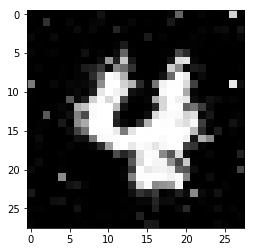

epoch 5602 [D:loss 0.58 D:acc 73.44] [G:loss 0.97]
epoch 5603 [D:loss 0.66 D:acc 54.69] [G:loss 0.91]
epoch 5604 [D:loss 0.62 D:acc 64.06] [G:loss 1.06]
epoch 5605 [D:loss 0.57 D:acc 75.00] [G:loss 1.13]
epoch 5606 [D:loss 0.52 D:acc 84.38] [G:loss 1.05]
epoch 5607 [D:loss 0.67 D:acc 56.25] [G:loss 0.93]
epoch 5608 [D:loss 0.61 D:acc 59.38] [G:loss 1.01]
epoch 5609 [D:loss 0.57 D:acc 67.19] [G:loss 0.94]
epoch 5610 [D:loss 0.70 D:acc 56.25] [G:loss 0.97]
epoch 5611 [D:loss 0.58 D:acc 62.50] [G:loss 0.88]
epoch 5612 [D:loss 0.58 D:acc 65.62] [G:loss 0.97]
epoch 5613 [D:loss 0.62 D:acc 59.38] [G:loss 0.95]
epoch 5614 [D:loss 0.59 D:acc 71.88] [G:loss 0.95]
epoch 5615 [D:loss 0.58 D:acc 67.19] [G:loss 1.03]
epoch 5616 [D:loss 0.58 D:acc 76.56] [G:loss 0.96]
epoch 5617 [D:loss 0.65 D:acc 65.62] [G:loss 1.06]
epoch 5618 [D:loss 0.64 D:acc 65.62] [G:loss 0.93]
epoch 5619 [D:loss 0.62 D:acc 67.19] [G:loss 0.96]
epoch 5620 [D:loss 0.63 D:acc 62.50] [G:loss 0.99]
epoch 5621 [D:loss 0.66 D:acc 7

epoch 5764 [D:loss 0.67 D:acc 57.81] [G:loss 0.98]
epoch 5765 [D:loss 0.65 D:acc 60.94] [G:loss 1.07]
epoch 5766 [D:loss 0.61 D:acc 65.62] [G:loss 1.06]
epoch 5767 [D:loss 0.71 D:acc 56.25] [G:loss 0.89]
epoch 5768 [D:loss 0.58 D:acc 73.44] [G:loss 0.96]
epoch 5769 [D:loss 0.67 D:acc 56.25] [G:loss 0.99]
epoch 5770 [D:loss 0.61 D:acc 70.31] [G:loss 0.94]
epoch 5771 [D:loss 0.62 D:acc 60.94] [G:loss 1.02]
epoch 5772 [D:loss 0.57 D:acc 73.44] [G:loss 0.91]
epoch 5773 [D:loss 0.62 D:acc 68.75] [G:loss 0.98]
epoch 5774 [D:loss 0.63 D:acc 67.19] [G:loss 1.07]
epoch 5775 [D:loss 0.66 D:acc 56.25] [G:loss 0.97]
epoch 5776 [D:loss 0.69 D:acc 53.12] [G:loss 1.00]
epoch 5777 [D:loss 0.65 D:acc 60.94] [G:loss 0.92]
epoch 5778 [D:loss 0.60 D:acc 70.31] [G:loss 0.97]
epoch 5779 [D:loss 0.68 D:acc 56.25] [G:loss 0.92]
epoch 5780 [D:loss 0.62 D:acc 67.19] [G:loss 0.93]
epoch 5781 [D:loss 0.59 D:acc 71.88] [G:loss 0.87]
epoch 5782 [D:loss 0.62 D:acc 70.31] [G:loss 1.01]
epoch 5783 [D:loss 0.65 D:acc 6

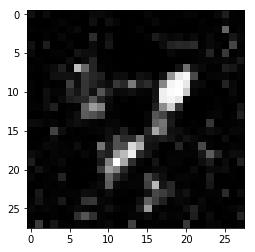

epoch 5802 [D:loss 0.62 D:acc 67.19] [G:loss 1.00]
epoch 5803 [D:loss 0.60 D:acc 67.19] [G:loss 1.04]
epoch 5804 [D:loss 0.57 D:acc 76.56] [G:loss 0.87]
epoch 5805 [D:loss 0.64 D:acc 64.06] [G:loss 0.91]
epoch 5806 [D:loss 0.57 D:acc 71.88] [G:loss 1.08]
epoch 5807 [D:loss 0.67 D:acc 62.50] [G:loss 1.09]
epoch 5808 [D:loss 0.69 D:acc 50.00] [G:loss 1.05]
epoch 5809 [D:loss 0.59 D:acc 76.56] [G:loss 0.95]
epoch 5810 [D:loss 0.62 D:acc 67.19] [G:loss 0.94]
epoch 5811 [D:loss 0.68 D:acc 48.44] [G:loss 0.97]
epoch 5812 [D:loss 0.61 D:acc 68.75] [G:loss 0.96]
epoch 5813 [D:loss 0.58 D:acc 70.31] [G:loss 0.94]
epoch 5814 [D:loss 0.56 D:acc 75.00] [G:loss 0.98]
epoch 5815 [D:loss 0.65 D:acc 62.50] [G:loss 0.90]
epoch 5816 [D:loss 0.66 D:acc 56.25] [G:loss 0.95]
epoch 5817 [D:loss 0.62 D:acc 59.38] [G:loss 0.96]
epoch 5818 [D:loss 0.62 D:acc 64.06] [G:loss 0.88]
epoch 5819 [D:loss 0.61 D:acc 64.06] [G:loss 0.89]
epoch 5820 [D:loss 0.65 D:acc 60.94] [G:loss 1.02]
epoch 5821 [D:loss 0.62 D:acc 6

epoch 5964 [D:loss 0.63 D:acc 67.19] [G:loss 0.95]
epoch 5965 [D:loss 0.63 D:acc 76.56] [G:loss 0.97]
epoch 5966 [D:loss 0.62 D:acc 70.31] [G:loss 1.00]
epoch 5967 [D:loss 0.66 D:acc 62.50] [G:loss 0.81]
epoch 5968 [D:loss 0.66 D:acc 56.25] [G:loss 0.99]
epoch 5969 [D:loss 0.63 D:acc 60.94] [G:loss 0.91]
epoch 5970 [D:loss 0.60 D:acc 68.75] [G:loss 1.02]
epoch 5971 [D:loss 0.62 D:acc 70.31] [G:loss 0.95]
epoch 5972 [D:loss 0.60 D:acc 71.88] [G:loss 0.88]
epoch 5973 [D:loss 0.63 D:acc 62.50] [G:loss 0.95]
epoch 5974 [D:loss 0.56 D:acc 75.00] [G:loss 1.05]
epoch 5975 [D:loss 0.56 D:acc 73.44] [G:loss 1.02]
epoch 5976 [D:loss 0.70 D:acc 62.50] [G:loss 1.02]
epoch 5977 [D:loss 0.55 D:acc 75.00] [G:loss 1.05]
epoch 5978 [D:loss 0.65 D:acc 62.50] [G:loss 0.96]
epoch 5979 [D:loss 0.64 D:acc 65.62] [G:loss 0.90]
epoch 5980 [D:loss 0.60 D:acc 67.19] [G:loss 0.96]
epoch 5981 [D:loss 0.67 D:acc 56.25] [G:loss 0.95]
epoch 5982 [D:loss 0.67 D:acc 64.06] [G:loss 0.96]
epoch 5983 [D:loss 0.70 D:acc 5

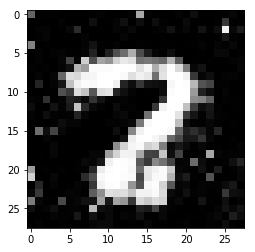

epoch 6002 [D:loss 0.65 D:acc 59.38] [G:loss 1.03]
epoch 6003 [D:loss 0.58 D:acc 65.62] [G:loss 1.05]
epoch 6004 [D:loss 0.72 D:acc 54.69] [G:loss 0.93]
epoch 6005 [D:loss 0.60 D:acc 68.75] [G:loss 0.93]
epoch 6006 [D:loss 0.57 D:acc 68.75] [G:loss 1.02]
epoch 6007 [D:loss 0.62 D:acc 64.06] [G:loss 1.00]
epoch 6008 [D:loss 0.55 D:acc 65.62] [G:loss 0.99]
epoch 6009 [D:loss 0.59 D:acc 64.06] [G:loss 0.99]
epoch 6010 [D:loss 0.61 D:acc 59.38] [G:loss 0.95]
epoch 6011 [D:loss 0.65 D:acc 62.50] [G:loss 0.93]
epoch 6012 [D:loss 0.66 D:acc 57.81] [G:loss 0.99]
epoch 6013 [D:loss 0.68 D:acc 59.38] [G:loss 0.87]
epoch 6014 [D:loss 0.61 D:acc 71.88] [G:loss 0.93]
epoch 6015 [D:loss 0.61 D:acc 67.19] [G:loss 0.91]
epoch 6016 [D:loss 0.55 D:acc 71.88] [G:loss 0.92]
epoch 6017 [D:loss 0.65 D:acc 62.50] [G:loss 0.90]
epoch 6018 [D:loss 0.54 D:acc 78.12] [G:loss 0.90]
epoch 6019 [D:loss 0.65 D:acc 57.81] [G:loss 0.82]
epoch 6020 [D:loss 0.62 D:acc 62.50] [G:loss 0.92]
epoch 6021 [D:loss 0.62 D:acc 6

epoch 6164 [D:loss 0.66 D:acc 62.50] [G:loss 0.91]
epoch 6165 [D:loss 0.66 D:acc 62.50] [G:loss 1.02]
epoch 6166 [D:loss 0.59 D:acc 73.44] [G:loss 0.88]
epoch 6167 [D:loss 0.57 D:acc 75.00] [G:loss 1.01]
epoch 6168 [D:loss 0.54 D:acc 81.25] [G:loss 0.96]
epoch 6169 [D:loss 0.66 D:acc 64.06] [G:loss 0.94]
epoch 6170 [D:loss 0.63 D:acc 62.50] [G:loss 0.94]
epoch 6171 [D:loss 0.57 D:acc 67.19] [G:loss 0.95]
epoch 6172 [D:loss 0.67 D:acc 64.06] [G:loss 0.85]
epoch 6173 [D:loss 0.64 D:acc 65.62] [G:loss 1.00]
epoch 6174 [D:loss 0.67 D:acc 54.69] [G:loss 0.95]
epoch 6175 [D:loss 0.59 D:acc 76.56] [G:loss 0.92]
epoch 6176 [D:loss 0.64 D:acc 65.62] [G:loss 0.97]
epoch 6177 [D:loss 0.55 D:acc 70.31] [G:loss 0.91]
epoch 6178 [D:loss 0.55 D:acc 76.56] [G:loss 0.98]
epoch 6179 [D:loss 0.50 D:acc 78.12] [G:loss 0.85]
epoch 6180 [D:loss 0.69 D:acc 57.81] [G:loss 0.96]
epoch 6181 [D:loss 0.60 D:acc 68.75] [G:loss 0.95]
epoch 6182 [D:loss 0.61 D:acc 67.19] [G:loss 1.06]
epoch 6183 [D:loss 0.66 D:acc 6

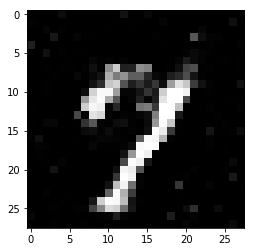

epoch 6202 [D:loss 0.64 D:acc 64.06] [G:loss 0.91]
epoch 6203 [D:loss 0.62 D:acc 62.50] [G:loss 0.99]
epoch 6204 [D:loss 0.62 D:acc 70.31] [G:loss 0.94]
epoch 6205 [D:loss 0.72 D:acc 60.94] [G:loss 1.05]
epoch 6206 [D:loss 0.58 D:acc 70.31] [G:loss 1.08]
epoch 6207 [D:loss 0.64 D:acc 64.06] [G:loss 1.01]
epoch 6208 [D:loss 0.75 D:acc 51.56] [G:loss 0.88]
epoch 6209 [D:loss 0.60 D:acc 67.19] [G:loss 0.93]
epoch 6210 [D:loss 0.59 D:acc 64.06] [G:loss 0.96]
epoch 6211 [D:loss 0.65 D:acc 62.50] [G:loss 1.05]
epoch 6212 [D:loss 0.66 D:acc 56.25] [G:loss 0.97]
epoch 6213 [D:loss 0.70 D:acc 56.25] [G:loss 0.94]
epoch 6214 [D:loss 0.66 D:acc 59.38] [G:loss 1.02]
epoch 6215 [D:loss 0.63 D:acc 67.19] [G:loss 0.99]
epoch 6216 [D:loss 0.64 D:acc 65.62] [G:loss 1.00]
epoch 6217 [D:loss 0.56 D:acc 71.88] [G:loss 0.99]
epoch 6218 [D:loss 0.63 D:acc 65.62] [G:loss 0.89]
epoch 6219 [D:loss 0.64 D:acc 65.62] [G:loss 0.92]
epoch 6220 [D:loss 0.58 D:acc 76.56] [G:loss 0.89]
epoch 6221 [D:loss 0.62 D:acc 7

epoch 6364 [D:loss 0.57 D:acc 75.00] [G:loss 1.13]
epoch 6365 [D:loss 0.68 D:acc 57.81] [G:loss 1.02]
epoch 6366 [D:loss 0.68 D:acc 60.94] [G:loss 1.02]
epoch 6367 [D:loss 0.68 D:acc 62.50] [G:loss 0.91]
epoch 6368 [D:loss 0.59 D:acc 70.31] [G:loss 0.93]
epoch 6369 [D:loss 0.58 D:acc 73.44] [G:loss 1.02]
epoch 6370 [D:loss 0.66 D:acc 64.06] [G:loss 0.97]
epoch 6371 [D:loss 0.65 D:acc 65.62] [G:loss 1.01]
epoch 6372 [D:loss 0.64 D:acc 68.75] [G:loss 1.02]
epoch 6373 [D:loss 0.60 D:acc 68.75] [G:loss 0.90]
epoch 6374 [D:loss 0.64 D:acc 60.94] [G:loss 0.91]
epoch 6375 [D:loss 0.71 D:acc 57.81] [G:loss 0.98]
epoch 6376 [D:loss 0.60 D:acc 71.88] [G:loss 0.92]
epoch 6377 [D:loss 0.61 D:acc 70.31] [G:loss 0.97]
epoch 6378 [D:loss 0.72 D:acc 56.25] [G:loss 1.07]
epoch 6379 [D:loss 0.66 D:acc 62.50] [G:loss 0.96]
epoch 6380 [D:loss 0.61 D:acc 70.31] [G:loss 0.94]
epoch 6381 [D:loss 0.63 D:acc 60.94] [G:loss 1.00]
epoch 6382 [D:loss 0.57 D:acc 67.19] [G:loss 0.96]
epoch 6383 [D:loss 0.65 D:acc 6

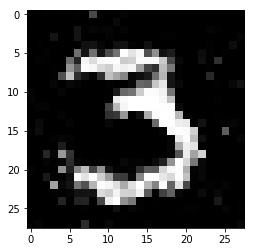

epoch 6402 [D:loss 0.64 D:acc 68.75] [G:loss 1.02]
epoch 6403 [D:loss 0.62 D:acc 65.62] [G:loss 0.91]
epoch 6404 [D:loss 0.58 D:acc 68.75] [G:loss 0.95]
epoch 6405 [D:loss 0.71 D:acc 56.25] [G:loss 0.98]
epoch 6406 [D:loss 0.60 D:acc 67.19] [G:loss 1.05]
epoch 6407 [D:loss 0.54 D:acc 76.56] [G:loss 1.08]
epoch 6408 [D:loss 0.60 D:acc 64.06] [G:loss 0.98]
epoch 6409 [D:loss 0.66 D:acc 56.25] [G:loss 0.89]
epoch 6410 [D:loss 0.61 D:acc 64.06] [G:loss 1.00]
epoch 6411 [D:loss 0.55 D:acc 75.00] [G:loss 1.02]
epoch 6412 [D:loss 0.62 D:acc 64.06] [G:loss 0.97]
epoch 6413 [D:loss 0.62 D:acc 68.75] [G:loss 0.98]
epoch 6414 [D:loss 0.65 D:acc 60.94] [G:loss 1.08]
epoch 6415 [D:loss 0.66 D:acc 59.38] [G:loss 0.95]
epoch 6416 [D:loss 0.69 D:acc 60.94] [G:loss 1.14]
epoch 6417 [D:loss 0.62 D:acc 68.75] [G:loss 0.94]
epoch 6418 [D:loss 0.65 D:acc 60.94] [G:loss 1.03]
epoch 6419 [D:loss 0.63 D:acc 56.25] [G:loss 0.97]
epoch 6420 [D:loss 0.63 D:acc 59.38] [G:loss 0.96]
epoch 6421 [D:loss 0.60 D:acc 6

epoch 6565 [D:loss 0.63 D:acc 67.19] [G:loss 1.03]
epoch 6566 [D:loss 0.65 D:acc 59.38] [G:loss 0.96]
epoch 6567 [D:loss 0.61 D:acc 71.88] [G:loss 1.11]
epoch 6568 [D:loss 0.66 D:acc 56.25] [G:loss 0.97]
epoch 6569 [D:loss 0.55 D:acc 71.88] [G:loss 0.95]
epoch 6570 [D:loss 0.57 D:acc 70.31] [G:loss 0.98]
epoch 6571 [D:loss 0.64 D:acc 64.06] [G:loss 0.88]
epoch 6572 [D:loss 0.60 D:acc 67.19] [G:loss 1.00]
epoch 6573 [D:loss 0.64 D:acc 71.88] [G:loss 0.91]
epoch 6574 [D:loss 0.62 D:acc 62.50] [G:loss 1.09]
epoch 6575 [D:loss 0.63 D:acc 68.75] [G:loss 1.02]
epoch 6576 [D:loss 0.59 D:acc 71.88] [G:loss 1.02]
epoch 6577 [D:loss 0.68 D:acc 54.69] [G:loss 0.98]
epoch 6578 [D:loss 0.66 D:acc 56.25] [G:loss 0.99]
epoch 6579 [D:loss 0.57 D:acc 73.44] [G:loss 0.94]
epoch 6580 [D:loss 0.58 D:acc 70.31] [G:loss 1.03]
epoch 6581 [D:loss 0.66 D:acc 60.94] [G:loss 0.99]
epoch 6582 [D:loss 0.66 D:acc 70.31] [G:loss 1.00]
epoch 6583 [D:loss 0.74 D:acc 51.56] [G:loss 0.93]
epoch 6584 [D:loss 0.65 D:acc 6

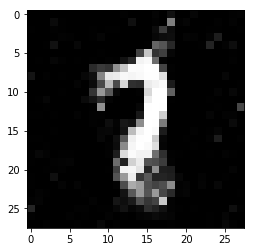

epoch 6602 [D:loss 0.63 D:acc 68.75] [G:loss 0.95]
epoch 6603 [D:loss 0.59 D:acc 67.19] [G:loss 0.98]
epoch 6604 [D:loss 0.61 D:acc 68.75] [G:loss 0.91]
epoch 6605 [D:loss 0.61 D:acc 65.62] [G:loss 1.07]
epoch 6606 [D:loss 0.66 D:acc 60.94] [G:loss 0.84]
epoch 6607 [D:loss 0.63 D:acc 60.94] [G:loss 0.93]
epoch 6608 [D:loss 0.63 D:acc 62.50] [G:loss 0.90]
epoch 6609 [D:loss 0.59 D:acc 68.75] [G:loss 1.02]
epoch 6610 [D:loss 0.65 D:acc 60.94] [G:loss 0.95]
epoch 6611 [D:loss 0.61 D:acc 60.94] [G:loss 0.92]
epoch 6612 [D:loss 0.61 D:acc 67.19] [G:loss 1.02]
epoch 6613 [D:loss 0.60 D:acc 70.31] [G:loss 0.86]
epoch 6614 [D:loss 0.60 D:acc 70.31] [G:loss 0.95]
epoch 6615 [D:loss 0.63 D:acc 60.94] [G:loss 0.91]
epoch 6616 [D:loss 0.62 D:acc 64.06] [G:loss 0.91]
epoch 6617 [D:loss 0.69 D:acc 53.12] [G:loss 0.94]
epoch 6618 [D:loss 0.62 D:acc 70.31] [G:loss 1.08]
epoch 6619 [D:loss 0.66 D:acc 59.38] [G:loss 1.05]
epoch 6620 [D:loss 0.56 D:acc 76.56] [G:loss 1.10]
epoch 6621 [D:loss 0.61 D:acc 6

epoch 6763 [D:loss 0.67 D:acc 60.94] [G:loss 0.88]
epoch 6764 [D:loss 0.64 D:acc 70.31] [G:loss 0.97]
epoch 6765 [D:loss 0.67 D:acc 62.50] [G:loss 1.06]
epoch 6766 [D:loss 0.58 D:acc 67.19] [G:loss 0.85]
epoch 6767 [D:loss 0.63 D:acc 60.94] [G:loss 0.94]
epoch 6768 [D:loss 0.57 D:acc 70.31] [G:loss 0.88]
epoch 6769 [D:loss 0.60 D:acc 79.69] [G:loss 0.91]
epoch 6770 [D:loss 0.74 D:acc 53.12] [G:loss 0.99]
epoch 6771 [D:loss 0.68 D:acc 62.50] [G:loss 1.03]
epoch 6772 [D:loss 0.57 D:acc 70.31] [G:loss 1.01]
epoch 6773 [D:loss 0.65 D:acc 60.94] [G:loss 0.93]
epoch 6774 [D:loss 0.58 D:acc 67.19] [G:loss 0.93]
epoch 6775 [D:loss 0.63 D:acc 62.50] [G:loss 0.90]
epoch 6776 [D:loss 0.59 D:acc 68.75] [G:loss 0.92]
epoch 6777 [D:loss 0.65 D:acc 67.19] [G:loss 0.96]
epoch 6778 [D:loss 0.61 D:acc 62.50] [G:loss 1.03]
epoch 6779 [D:loss 0.66 D:acc 60.94] [G:loss 1.01]
epoch 6780 [D:loss 0.72 D:acc 51.56] [G:loss 0.94]
epoch 6781 [D:loss 0.64 D:acc 65.62] [G:loss 0.96]
epoch 6782 [D:loss 0.66 D:acc 5

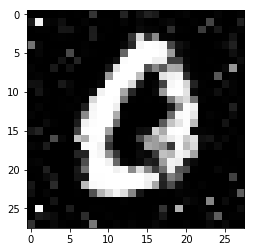

epoch 6802 [D:loss 0.63 D:acc 67.19] [G:loss 0.87]
epoch 6803 [D:loss 0.62 D:acc 64.06] [G:loss 1.01]
epoch 6804 [D:loss 0.59 D:acc 73.44] [G:loss 0.88]
epoch 6805 [D:loss 0.70 D:acc 48.44] [G:loss 0.95]
epoch 6806 [D:loss 0.59 D:acc 70.31] [G:loss 0.94]
epoch 6807 [D:loss 0.66 D:acc 60.94] [G:loss 1.05]
epoch 6808 [D:loss 0.60 D:acc 70.31] [G:loss 0.99]
epoch 6809 [D:loss 0.64 D:acc 59.38] [G:loss 1.06]
epoch 6810 [D:loss 0.65 D:acc 62.50] [G:loss 0.96]
epoch 6811 [D:loss 0.62 D:acc 60.94] [G:loss 0.92]
epoch 6812 [D:loss 0.66 D:acc 60.94] [G:loss 1.10]
epoch 6813 [D:loss 0.60 D:acc 64.06] [G:loss 1.01]
epoch 6814 [D:loss 0.70 D:acc 60.94] [G:loss 1.03]
epoch 6815 [D:loss 0.56 D:acc 73.44] [G:loss 1.04]
epoch 6816 [D:loss 0.64 D:acc 64.06] [G:loss 1.01]
epoch 6817 [D:loss 0.64 D:acc 59.38] [G:loss 1.05]
epoch 6818 [D:loss 0.71 D:acc 59.38] [G:loss 0.98]
epoch 6819 [D:loss 0.64 D:acc 57.81] [G:loss 0.98]
epoch 6820 [D:loss 0.59 D:acc 70.31] [G:loss 1.00]
epoch 6821 [D:loss 0.56 D:acc 7

epoch 6964 [D:loss 0.59 D:acc 70.31] [G:loss 0.98]
epoch 6965 [D:loss 0.59 D:acc 75.00] [G:loss 0.96]
epoch 6966 [D:loss 0.67 D:acc 59.38] [G:loss 0.99]
epoch 6967 [D:loss 0.62 D:acc 62.50] [G:loss 1.01]
epoch 6968 [D:loss 0.68 D:acc 57.81] [G:loss 1.03]
epoch 6969 [D:loss 0.63 D:acc 65.62] [G:loss 1.11]
epoch 6970 [D:loss 0.65 D:acc 71.88] [G:loss 0.96]
epoch 6971 [D:loss 0.65 D:acc 65.62] [G:loss 1.00]
epoch 6972 [D:loss 0.57 D:acc 78.12] [G:loss 0.99]
epoch 6973 [D:loss 0.69 D:acc 53.12] [G:loss 0.94]
epoch 6974 [D:loss 0.62 D:acc 75.00] [G:loss 0.88]
epoch 6975 [D:loss 0.57 D:acc 68.75] [G:loss 0.94]
epoch 6976 [D:loss 0.62 D:acc 64.06] [G:loss 0.86]
epoch 6977 [D:loss 0.65 D:acc 65.62] [G:loss 0.91]
epoch 6978 [D:loss 0.63 D:acc 64.06] [G:loss 0.91]
epoch 6979 [D:loss 0.70 D:acc 57.81] [G:loss 1.07]
epoch 6980 [D:loss 0.62 D:acc 60.94] [G:loss 0.98]
epoch 6981 [D:loss 0.68 D:acc 62.50] [G:loss 0.96]
epoch 6982 [D:loss 0.64 D:acc 68.75] [G:loss 0.98]
epoch 6983 [D:loss 0.70 D:acc 5

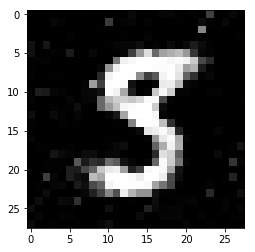

epoch 7002 [D:loss 0.62 D:acc 62.50] [G:loss 0.98]
epoch 7003 [D:loss 0.65 D:acc 60.94] [G:loss 1.01]
epoch 7004 [D:loss 0.61 D:acc 65.62] [G:loss 0.97]
epoch 7005 [D:loss 0.63 D:acc 70.31] [G:loss 1.04]
epoch 7006 [D:loss 0.58 D:acc 65.62] [G:loss 1.01]
epoch 7007 [D:loss 0.63 D:acc 71.88] [G:loss 1.05]
epoch 7008 [D:loss 0.65 D:acc 62.50] [G:loss 0.99]
epoch 7009 [D:loss 0.51 D:acc 78.12] [G:loss 0.99]
epoch 7010 [D:loss 0.66 D:acc 59.38] [G:loss 1.09]
epoch 7011 [D:loss 0.64 D:acc 60.94] [G:loss 0.91]
epoch 7012 [D:loss 0.62 D:acc 60.94] [G:loss 1.09]
epoch 7013 [D:loss 0.66 D:acc 57.81] [G:loss 0.96]
epoch 7014 [D:loss 0.69 D:acc 54.69] [G:loss 0.97]
epoch 7015 [D:loss 0.62 D:acc 65.62] [G:loss 0.96]
epoch 7016 [D:loss 0.60 D:acc 68.75] [G:loss 1.09]
epoch 7017 [D:loss 0.64 D:acc 62.50] [G:loss 1.09]
epoch 7018 [D:loss 0.55 D:acc 68.75] [G:loss 0.94]
epoch 7019 [D:loss 0.74 D:acc 51.56] [G:loss 0.94]
epoch 7020 [D:loss 0.64 D:acc 64.06] [G:loss 1.03]
epoch 7021 [D:loss 0.60 D:acc 6

epoch 7166 [D:loss 0.63 D:acc 62.50] [G:loss 0.99]
epoch 7167 [D:loss 0.62 D:acc 57.81] [G:loss 0.95]
epoch 7168 [D:loss 0.59 D:acc 68.75] [G:loss 0.97]
epoch 7169 [D:loss 0.58 D:acc 70.31] [G:loss 1.00]
epoch 7170 [D:loss 0.65 D:acc 57.81] [G:loss 1.04]
epoch 7171 [D:loss 0.64 D:acc 65.62] [G:loss 1.00]
epoch 7172 [D:loss 0.58 D:acc 71.88] [G:loss 0.95]
epoch 7173 [D:loss 0.64 D:acc 73.44] [G:loss 0.96]
epoch 7174 [D:loss 0.75 D:acc 54.69] [G:loss 0.88]
epoch 7175 [D:loss 0.58 D:acc 70.31] [G:loss 0.92]
epoch 7176 [D:loss 0.59 D:acc 70.31] [G:loss 0.96]
epoch 7177 [D:loss 0.66 D:acc 54.69] [G:loss 0.84]
epoch 7178 [D:loss 0.60 D:acc 67.19] [G:loss 0.87]
epoch 7179 [D:loss 0.63 D:acc 65.62] [G:loss 1.00]
epoch 7180 [D:loss 0.64 D:acc 62.50] [G:loss 0.92]
epoch 7181 [D:loss 0.61 D:acc 67.19] [G:loss 1.01]
epoch 7182 [D:loss 0.68 D:acc 59.38] [G:loss 0.89]
epoch 7183 [D:loss 0.65 D:acc 60.94] [G:loss 0.96]
epoch 7184 [D:loss 0.68 D:acc 59.38] [G:loss 0.97]
epoch 7185 [D:loss 0.59 D:acc 6

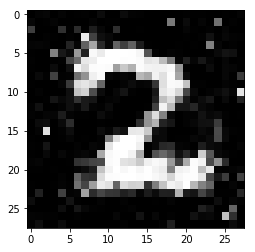

epoch 7202 [D:loss 0.59 D:acc 70.31] [G:loss 0.93]
epoch 7203 [D:loss 0.60 D:acc 67.19] [G:loss 0.94]
epoch 7204 [D:loss 0.73 D:acc 48.44] [G:loss 0.97]
epoch 7205 [D:loss 0.60 D:acc 71.88] [G:loss 1.07]
epoch 7206 [D:loss 0.60 D:acc 68.75] [G:loss 1.08]
epoch 7207 [D:loss 0.65 D:acc 64.06] [G:loss 1.00]
epoch 7208 [D:loss 0.61 D:acc 68.75] [G:loss 0.94]
epoch 7209 [D:loss 0.65 D:acc 60.94] [G:loss 0.93]
epoch 7210 [D:loss 0.61 D:acc 68.75] [G:loss 1.01]
epoch 7211 [D:loss 0.68 D:acc 56.25] [G:loss 1.00]
epoch 7212 [D:loss 0.62 D:acc 62.50] [G:loss 1.09]
epoch 7213 [D:loss 0.65 D:acc 59.38] [G:loss 1.01]
epoch 7214 [D:loss 0.60 D:acc 73.44] [G:loss 0.96]
epoch 7215 [D:loss 0.64 D:acc 57.81] [G:loss 0.95]
epoch 7216 [D:loss 0.70 D:acc 50.00] [G:loss 0.89]
epoch 7217 [D:loss 0.62 D:acc 62.50] [G:loss 0.98]
epoch 7218 [D:loss 0.70 D:acc 57.81] [G:loss 0.93]
epoch 7219 [D:loss 0.64 D:acc 57.81] [G:loss 0.99]
epoch 7220 [D:loss 0.65 D:acc 59.38] [G:loss 0.91]
epoch 7221 [D:loss 0.69 D:acc 5

epoch 7364 [D:loss 0.63 D:acc 67.19] [G:loss 1.08]
epoch 7365 [D:loss 0.68 D:acc 60.94] [G:loss 1.05]
epoch 7366 [D:loss 0.62 D:acc 68.75] [G:loss 1.04]
epoch 7367 [D:loss 0.61 D:acc 67.19] [G:loss 1.03]
epoch 7368 [D:loss 0.68 D:acc 59.38] [G:loss 0.89]
epoch 7369 [D:loss 0.60 D:acc 62.50] [G:loss 0.97]
epoch 7370 [D:loss 0.67 D:acc 57.81] [G:loss 0.97]
epoch 7371 [D:loss 0.60 D:acc 70.31] [G:loss 0.95]
epoch 7372 [D:loss 0.61 D:acc 70.31] [G:loss 0.94]
epoch 7373 [D:loss 0.59 D:acc 70.31] [G:loss 0.87]
epoch 7374 [D:loss 0.64 D:acc 62.50] [G:loss 0.95]
epoch 7375 [D:loss 0.63 D:acc 64.06] [G:loss 0.95]
epoch 7376 [D:loss 0.64 D:acc 60.94] [G:loss 0.95]
epoch 7377 [D:loss 0.60 D:acc 67.19] [G:loss 1.05]
epoch 7378 [D:loss 0.63 D:acc 62.50] [G:loss 1.08]
epoch 7379 [D:loss 0.59 D:acc 73.44] [G:loss 1.03]
epoch 7380 [D:loss 0.60 D:acc 65.62] [G:loss 1.03]
epoch 7381 [D:loss 0.68 D:acc 64.06] [G:loss 1.12]
epoch 7382 [D:loss 0.65 D:acc 56.25] [G:loss 1.09]
epoch 7383 [D:loss 0.61 D:acc 6

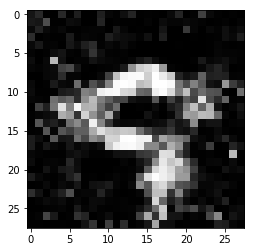

epoch 7402 [D:loss 0.61 D:acc 64.06] [G:loss 0.99]
epoch 7403 [D:loss 0.63 D:acc 64.06] [G:loss 0.92]
epoch 7404 [D:loss 0.59 D:acc 73.44] [G:loss 0.84]
epoch 7405 [D:loss 0.58 D:acc 65.62] [G:loss 0.91]
epoch 7406 [D:loss 0.62 D:acc 68.75] [G:loss 0.91]
epoch 7407 [D:loss 0.58 D:acc 70.31] [G:loss 1.05]
epoch 7408 [D:loss 0.65 D:acc 67.19] [G:loss 1.00]
epoch 7409 [D:loss 0.54 D:acc 73.44] [G:loss 0.94]
epoch 7410 [D:loss 0.68 D:acc 53.12] [G:loss 0.90]
epoch 7411 [D:loss 0.66 D:acc 59.38] [G:loss 0.93]
epoch 7412 [D:loss 0.62 D:acc 60.94] [G:loss 0.89]
epoch 7413 [D:loss 0.61 D:acc 67.19] [G:loss 1.00]
epoch 7414 [D:loss 0.62 D:acc 67.19] [G:loss 1.07]
epoch 7415 [D:loss 0.66 D:acc 60.94] [G:loss 0.94]
epoch 7416 [D:loss 0.66 D:acc 59.38] [G:loss 1.07]
epoch 7417 [D:loss 0.67 D:acc 59.38] [G:loss 0.92]
epoch 7418 [D:loss 0.66 D:acc 59.38] [G:loss 0.99]
epoch 7419 [D:loss 0.65 D:acc 59.38] [G:loss 1.04]
epoch 7420 [D:loss 0.69 D:acc 54.69] [G:loss 0.94]
epoch 7421 [D:loss 0.54 D:acc 7

epoch 7564 [D:loss 0.66 D:acc 60.94] [G:loss 0.97]
epoch 7565 [D:loss 0.62 D:acc 57.81] [G:loss 1.04]
epoch 7566 [D:loss 0.65 D:acc 62.50] [G:loss 1.05]
epoch 7567 [D:loss 0.60 D:acc 67.19] [G:loss 0.93]
epoch 7568 [D:loss 0.70 D:acc 57.81] [G:loss 0.93]
epoch 7569 [D:loss 0.59 D:acc 73.44] [G:loss 1.03]
epoch 7570 [D:loss 0.65 D:acc 57.81] [G:loss 0.96]
epoch 7571 [D:loss 0.69 D:acc 56.25] [G:loss 0.91]
epoch 7572 [D:loss 0.66 D:acc 59.38] [G:loss 0.86]
epoch 7573 [D:loss 0.66 D:acc 62.50] [G:loss 0.94]
epoch 7574 [D:loss 0.60 D:acc 71.88] [G:loss 1.01]
epoch 7575 [D:loss 0.62 D:acc 64.06] [G:loss 0.97]
epoch 7576 [D:loss 0.64 D:acc 65.62] [G:loss 0.99]
epoch 7577 [D:loss 0.65 D:acc 62.50] [G:loss 0.95]
epoch 7578 [D:loss 0.55 D:acc 75.00] [G:loss 0.98]
epoch 7579 [D:loss 0.63 D:acc 65.62] [G:loss 1.05]
epoch 7580 [D:loss 0.57 D:acc 73.44] [G:loss 0.96]
epoch 7581 [D:loss 0.70 D:acc 56.25] [G:loss 0.95]
epoch 7582 [D:loss 0.68 D:acc 57.81] [G:loss 0.87]
epoch 7583 [D:loss 0.63 D:acc 6

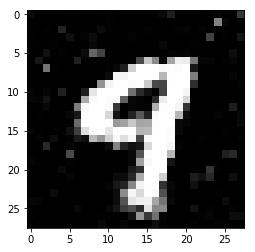

epoch 7602 [D:loss 0.64 D:acc 65.62] [G:loss 0.96]
epoch 7603 [D:loss 0.67 D:acc 59.38] [G:loss 0.96]
epoch 7604 [D:loss 0.59 D:acc 70.31] [G:loss 1.01]
epoch 7605 [D:loss 0.62 D:acc 67.19] [G:loss 0.95]
epoch 7606 [D:loss 0.61 D:acc 73.44] [G:loss 1.03]
epoch 7607 [D:loss 0.68 D:acc 57.81] [G:loss 0.94]
epoch 7608 [D:loss 0.65 D:acc 60.94] [G:loss 0.89]
epoch 7609 [D:loss 0.58 D:acc 73.44] [G:loss 0.81]
epoch 7610 [D:loss 0.66 D:acc 67.19] [G:loss 0.90]
epoch 7611 [D:loss 0.67 D:acc 59.38] [G:loss 0.98]
epoch 7612 [D:loss 0.66 D:acc 53.12] [G:loss 1.04]
epoch 7613 [D:loss 0.59 D:acc 68.75] [G:loss 0.91]
epoch 7614 [D:loss 0.64 D:acc 62.50] [G:loss 0.98]
epoch 7615 [D:loss 0.68 D:acc 56.25] [G:loss 1.06]
epoch 7616 [D:loss 0.68 D:acc 59.38] [G:loss 0.99]
epoch 7617 [D:loss 0.61 D:acc 67.19] [G:loss 0.94]
epoch 7618 [D:loss 0.64 D:acc 64.06] [G:loss 0.95]
epoch 7619 [D:loss 0.60 D:acc 68.75] [G:loss 0.93]
epoch 7620 [D:loss 0.64 D:acc 65.62] [G:loss 0.94]
epoch 7621 [D:loss 0.67 D:acc 6

epoch 7767 [D:loss 0.65 D:acc 59.38] [G:loss 1.03]
epoch 7768 [D:loss 0.60 D:acc 62.50] [G:loss 0.88]
epoch 7769 [D:loss 0.64 D:acc 65.62] [G:loss 1.02]
epoch 7770 [D:loss 0.62 D:acc 65.62] [G:loss 1.13]
epoch 7771 [D:loss 0.72 D:acc 57.81] [G:loss 0.99]
epoch 7772 [D:loss 0.64 D:acc 59.38] [G:loss 1.07]
epoch 7773 [D:loss 0.67 D:acc 65.62] [G:loss 0.97]
epoch 7774 [D:loss 0.66 D:acc 57.81] [G:loss 1.01]
epoch 7775 [D:loss 0.58 D:acc 73.44] [G:loss 0.90]
epoch 7776 [D:loss 0.64 D:acc 64.06] [G:loss 0.96]
epoch 7777 [D:loss 0.61 D:acc 67.19] [G:loss 0.86]
epoch 7778 [D:loss 0.68 D:acc 59.38] [G:loss 0.92]
epoch 7779 [D:loss 0.65 D:acc 56.25] [G:loss 0.90]
epoch 7780 [D:loss 0.69 D:acc 60.94] [G:loss 0.95]
epoch 7781 [D:loss 0.62 D:acc 60.94] [G:loss 0.97]
epoch 7782 [D:loss 0.58 D:acc 71.88] [G:loss 1.00]
epoch 7783 [D:loss 0.66 D:acc 59.38] [G:loss 0.95]
epoch 7784 [D:loss 0.59 D:acc 68.75] [G:loss 0.89]
epoch 7785 [D:loss 0.64 D:acc 65.62] [G:loss 0.96]
epoch 7786 [D:loss 0.60 D:acc 6

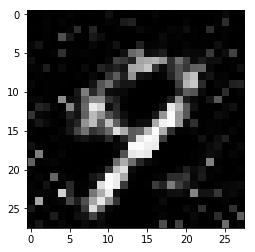

epoch 7802 [D:loss 0.66 D:acc 56.25] [G:loss 0.95]
epoch 7803 [D:loss 0.61 D:acc 70.31] [G:loss 1.01]
epoch 7804 [D:loss 0.64 D:acc 64.06] [G:loss 0.97]
epoch 7805 [D:loss 0.58 D:acc 71.88] [G:loss 1.01]
epoch 7806 [D:loss 0.67 D:acc 59.38] [G:loss 0.95]
epoch 7807 [D:loss 0.67 D:acc 54.69] [G:loss 0.97]
epoch 7808 [D:loss 0.63 D:acc 62.50] [G:loss 0.99]
epoch 7809 [D:loss 0.67 D:acc 59.38] [G:loss 1.01]
epoch 7810 [D:loss 0.59 D:acc 73.44] [G:loss 0.99]
epoch 7811 [D:loss 0.62 D:acc 64.06] [G:loss 0.87]
epoch 7812 [D:loss 0.65 D:acc 67.19] [G:loss 0.95]
epoch 7813 [D:loss 0.64 D:acc 62.50] [G:loss 1.00]
epoch 7814 [D:loss 0.58 D:acc 62.50] [G:loss 1.02]
epoch 7815 [D:loss 0.65 D:acc 62.50] [G:loss 1.01]
epoch 7816 [D:loss 0.63 D:acc 67.19] [G:loss 0.91]
epoch 7817 [D:loss 0.61 D:acc 64.06] [G:loss 1.03]
epoch 7818 [D:loss 0.64 D:acc 65.62] [G:loss 0.99]
epoch 7819 [D:loss 0.66 D:acc 56.25] [G:loss 0.94]
epoch 7820 [D:loss 0.64 D:acc 59.38] [G:loss 0.98]
epoch 7821 [D:loss 0.65 D:acc 5

epoch 7967 [D:loss 0.62 D:acc 70.31] [G:loss 0.99]
epoch 7968 [D:loss 0.63 D:acc 60.94] [G:loss 1.01]
epoch 7969 [D:loss 0.63 D:acc 67.19] [G:loss 0.97]
epoch 7970 [D:loss 0.65 D:acc 54.69] [G:loss 1.05]
epoch 7971 [D:loss 0.59 D:acc 65.62] [G:loss 0.93]
epoch 7972 [D:loss 0.68 D:acc 57.81] [G:loss 0.90]
epoch 7973 [D:loss 0.65 D:acc 65.62] [G:loss 0.96]
epoch 7974 [D:loss 0.65 D:acc 70.31] [G:loss 0.97]
epoch 7975 [D:loss 0.58 D:acc 73.44] [G:loss 1.13]
epoch 7976 [D:loss 0.60 D:acc 70.31] [G:loss 1.00]
epoch 7977 [D:loss 0.53 D:acc 75.00] [G:loss 1.03]
epoch 7978 [D:loss 0.65 D:acc 65.62] [G:loss 1.05]
epoch 7979 [D:loss 0.71 D:acc 54.69] [G:loss 1.06]
epoch 7980 [D:loss 0.64 D:acc 68.75] [G:loss 0.97]
epoch 7981 [D:loss 0.68 D:acc 60.94] [G:loss 0.93]
epoch 7982 [D:loss 0.61 D:acc 62.50] [G:loss 0.94]
epoch 7983 [D:loss 0.58 D:acc 71.88] [G:loss 0.97]
epoch 7984 [D:loss 0.65 D:acc 64.06] [G:loss 0.98]
epoch 7985 [D:loss 0.64 D:acc 62.50] [G:loss 0.97]
epoch 7986 [D:loss 0.64 D:acc 6

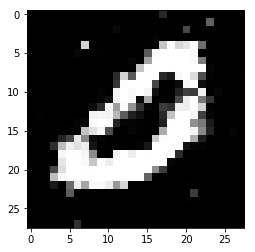

epoch 8002 [D:loss 0.67 D:acc 57.81] [G:loss 0.84]
epoch 8003 [D:loss 0.64 D:acc 59.38] [G:loss 0.91]
epoch 8004 [D:loss 0.62 D:acc 67.19] [G:loss 0.94]
epoch 8005 [D:loss 0.65 D:acc 64.06] [G:loss 1.02]
epoch 8006 [D:loss 0.62 D:acc 65.62] [G:loss 0.99]
epoch 8007 [D:loss 0.61 D:acc 65.62] [G:loss 0.95]
epoch 8008 [D:loss 0.69 D:acc 59.38] [G:loss 0.95]
epoch 8009 [D:loss 0.69 D:acc 60.94] [G:loss 1.05]
epoch 8010 [D:loss 0.67 D:acc 65.62] [G:loss 0.85]
epoch 8011 [D:loss 0.72 D:acc 56.25] [G:loss 0.96]
epoch 8012 [D:loss 0.59 D:acc 67.19] [G:loss 0.95]
epoch 8013 [D:loss 0.56 D:acc 73.44] [G:loss 1.00]
epoch 8014 [D:loss 0.61 D:acc 70.31] [G:loss 0.96]
epoch 8015 [D:loss 0.70 D:acc 60.94] [G:loss 1.02]
epoch 8016 [D:loss 0.62 D:acc 60.94] [G:loss 0.99]
epoch 8017 [D:loss 0.67 D:acc 57.81] [G:loss 0.87]
epoch 8018 [D:loss 0.64 D:acc 65.62] [G:loss 0.92]
epoch 8019 [D:loss 0.66 D:acc 65.62] [G:loss 0.90]
epoch 8020 [D:loss 0.62 D:acc 70.31] [G:loss 0.91]
epoch 8021 [D:loss 0.64 D:acc 6

epoch 8164 [D:loss 0.68 D:acc 56.25] [G:loss 0.94]
epoch 8165 [D:loss 0.60 D:acc 68.75] [G:loss 1.02]
epoch 8166 [D:loss 0.66 D:acc 56.25] [G:loss 0.91]
epoch 8167 [D:loss 0.60 D:acc 68.75] [G:loss 0.96]
epoch 8168 [D:loss 0.66 D:acc 65.62] [G:loss 1.00]
epoch 8169 [D:loss 0.62 D:acc 62.50] [G:loss 0.98]
epoch 8170 [D:loss 0.64 D:acc 51.56] [G:loss 0.90]
epoch 8171 [D:loss 0.65 D:acc 60.94] [G:loss 1.02]
epoch 8172 [D:loss 0.66 D:acc 64.06] [G:loss 0.90]
epoch 8173 [D:loss 0.67 D:acc 51.56] [G:loss 1.08]
epoch 8174 [D:loss 0.55 D:acc 76.56] [G:loss 1.06]
epoch 8175 [D:loss 0.54 D:acc 73.44] [G:loss 1.02]
epoch 8176 [D:loss 0.63 D:acc 56.25] [G:loss 0.94]
epoch 8177 [D:loss 0.63 D:acc 60.94] [G:loss 1.01]
epoch 8178 [D:loss 0.69 D:acc 50.00] [G:loss 0.96]
epoch 8179 [D:loss 0.62 D:acc 62.50] [G:loss 0.94]
epoch 8180 [D:loss 0.59 D:acc 71.88] [G:loss 1.05]
epoch 8181 [D:loss 0.75 D:acc 42.19] [G:loss 1.04]
epoch 8182 [D:loss 0.67 D:acc 59.38] [G:loss 1.05]
epoch 8183 [D:loss 0.67 D:acc 6

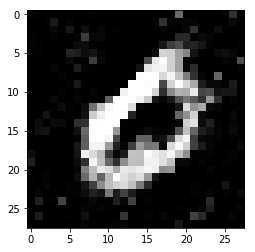

epoch 8202 [D:loss 0.64 D:acc 65.62] [G:loss 1.00]
epoch 8203 [D:loss 0.70 D:acc 56.25] [G:loss 0.95]
epoch 8204 [D:loss 0.60 D:acc 70.31] [G:loss 1.02]
epoch 8205 [D:loss 0.60 D:acc 64.06] [G:loss 0.94]
epoch 8206 [D:loss 0.67 D:acc 57.81] [G:loss 0.95]
epoch 8207 [D:loss 0.63 D:acc 68.75] [G:loss 0.93]
epoch 8208 [D:loss 0.67 D:acc 60.94] [G:loss 0.94]
epoch 8209 [D:loss 0.67 D:acc 64.06] [G:loss 0.93]
epoch 8210 [D:loss 0.71 D:acc 45.31] [G:loss 0.95]
epoch 8211 [D:loss 0.71 D:acc 56.25] [G:loss 0.98]
epoch 8212 [D:loss 0.59 D:acc 75.00] [G:loss 0.93]
epoch 8213 [D:loss 0.64 D:acc 65.62] [G:loss 0.92]
epoch 8214 [D:loss 0.63 D:acc 65.62] [G:loss 0.97]
epoch 8215 [D:loss 0.63 D:acc 67.19] [G:loss 0.93]
epoch 8216 [D:loss 0.66 D:acc 59.38] [G:loss 0.96]
epoch 8217 [D:loss 0.60 D:acc 73.44] [G:loss 0.93]
epoch 8218 [D:loss 0.60 D:acc 73.44] [G:loss 0.99]
epoch 8219 [D:loss 0.64 D:acc 60.94] [G:loss 1.03]
epoch 8220 [D:loss 0.68 D:acc 60.94] [G:loss 0.98]
epoch 8221 [D:loss 0.66 D:acc 6

epoch 8364 [D:loss 0.61 D:acc 68.75] [G:loss 0.95]
epoch 8365 [D:loss 0.63 D:acc 54.69] [G:loss 0.99]
epoch 8366 [D:loss 0.61 D:acc 71.88] [G:loss 0.96]
epoch 8367 [D:loss 0.58 D:acc 71.88] [G:loss 0.95]
epoch 8368 [D:loss 0.57 D:acc 70.31] [G:loss 0.97]
epoch 8369 [D:loss 0.67 D:acc 54.69] [G:loss 0.90]
epoch 8370 [D:loss 0.59 D:acc 67.19] [G:loss 1.01]
epoch 8371 [D:loss 0.68 D:acc 60.94] [G:loss 1.02]
epoch 8372 [D:loss 0.62 D:acc 64.06] [G:loss 0.99]
epoch 8373 [D:loss 0.59 D:acc 65.62] [G:loss 0.94]
epoch 8374 [D:loss 0.60 D:acc 73.44] [G:loss 0.90]
epoch 8375 [D:loss 0.69 D:acc 59.38] [G:loss 0.98]
epoch 8376 [D:loss 0.61 D:acc 59.38] [G:loss 0.96]
epoch 8377 [D:loss 0.65 D:acc 59.38] [G:loss 0.93]
epoch 8378 [D:loss 0.62 D:acc 59.38] [G:loss 0.97]
epoch 8379 [D:loss 0.70 D:acc 54.69] [G:loss 0.96]
epoch 8380 [D:loss 0.66 D:acc 60.94] [G:loss 0.98]
epoch 8381 [D:loss 0.65 D:acc 59.38] [G:loss 0.98]
epoch 8382 [D:loss 0.66 D:acc 62.50] [G:loss 0.99]
epoch 8383 [D:loss 0.64 D:acc 6

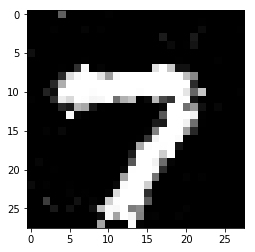

epoch 8402 [D:loss 0.68 D:acc 56.25] [G:loss 0.91]
epoch 8403 [D:loss 0.63 D:acc 59.38] [G:loss 0.86]
epoch 8404 [D:loss 0.60 D:acc 67.19] [G:loss 0.93]
epoch 8405 [D:loss 0.67 D:acc 64.06] [G:loss 0.92]
epoch 8406 [D:loss 0.69 D:acc 51.56] [G:loss 1.03]
epoch 8407 [D:loss 0.65 D:acc 59.38] [G:loss 1.05]
epoch 8408 [D:loss 0.65 D:acc 57.81] [G:loss 0.97]
epoch 8409 [D:loss 0.66 D:acc 56.25] [G:loss 0.96]
epoch 8410 [D:loss 0.61 D:acc 71.88] [G:loss 1.09]
epoch 8411 [D:loss 0.62 D:acc 73.44] [G:loss 1.02]
epoch 8412 [D:loss 0.60 D:acc 65.62] [G:loss 1.05]
epoch 8413 [D:loss 0.61 D:acc 65.62] [G:loss 1.03]
epoch 8414 [D:loss 0.71 D:acc 54.69] [G:loss 1.00]
epoch 8415 [D:loss 0.64 D:acc 65.62] [G:loss 0.88]
epoch 8416 [D:loss 0.64 D:acc 67.19] [G:loss 0.84]
epoch 8417 [D:loss 0.57 D:acc 73.44] [G:loss 0.95]
epoch 8418 [D:loss 0.64 D:acc 60.94] [G:loss 0.90]
epoch 8419 [D:loss 0.62 D:acc 65.62] [G:loss 1.00]
epoch 8420 [D:loss 0.60 D:acc 71.88] [G:loss 0.97]
epoch 8421 [D:loss 0.67 D:acc 5

epoch 8568 [D:loss 0.67 D:acc 56.25] [G:loss 0.97]
epoch 8569 [D:loss 0.64 D:acc 65.62] [G:loss 1.02]
epoch 8570 [D:loss 0.57 D:acc 71.88] [G:loss 0.93]
epoch 8571 [D:loss 0.62 D:acc 57.81] [G:loss 1.02]
epoch 8572 [D:loss 0.59 D:acc 71.88] [G:loss 1.02]
epoch 8573 [D:loss 0.67 D:acc 57.81] [G:loss 0.85]
epoch 8574 [D:loss 0.59 D:acc 65.62] [G:loss 1.01]
epoch 8575 [D:loss 0.60 D:acc 68.75] [G:loss 0.93]
epoch 8576 [D:loss 0.59 D:acc 71.88] [G:loss 0.88]
epoch 8577 [D:loss 0.63 D:acc 64.06] [G:loss 1.00]
epoch 8578 [D:loss 0.62 D:acc 70.31] [G:loss 0.83]
epoch 8579 [D:loss 0.69 D:acc 60.94] [G:loss 1.07]
epoch 8580 [D:loss 0.68 D:acc 57.81] [G:loss 0.91]
epoch 8581 [D:loss 0.62 D:acc 64.06] [G:loss 0.95]
epoch 8582 [D:loss 0.65 D:acc 57.81] [G:loss 0.86]
epoch 8583 [D:loss 0.65 D:acc 65.62] [G:loss 0.93]
epoch 8584 [D:loss 0.65 D:acc 64.06] [G:loss 0.91]
epoch 8585 [D:loss 0.66 D:acc 59.38] [G:loss 1.03]
epoch 8586 [D:loss 0.64 D:acc 64.06] [G:loss 0.93]
epoch 8587 [D:loss 0.62 D:acc 6

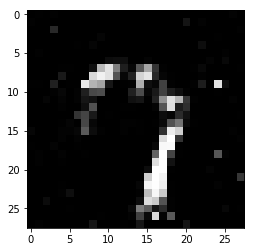

epoch 8602 [D:loss 0.67 D:acc 53.12] [G:loss 0.88]
epoch 8603 [D:loss 0.57 D:acc 68.75] [G:loss 0.95]
epoch 8604 [D:loss 0.67 D:acc 56.25] [G:loss 0.87]
epoch 8605 [D:loss 0.55 D:acc 75.00] [G:loss 0.95]
epoch 8606 [D:loss 0.74 D:acc 48.44] [G:loss 0.92]
epoch 8607 [D:loss 0.67 D:acc 54.69] [G:loss 0.81]
epoch 8608 [D:loss 0.59 D:acc 70.31] [G:loss 0.97]
epoch 8609 [D:loss 0.58 D:acc 68.75] [G:loss 1.11]
epoch 8610 [D:loss 0.68 D:acc 60.94] [G:loss 1.03]
epoch 8611 [D:loss 0.61 D:acc 70.31] [G:loss 1.01]
epoch 8612 [D:loss 0.70 D:acc 54.69] [G:loss 1.02]
epoch 8613 [D:loss 0.71 D:acc 54.69] [G:loss 1.03]
epoch 8614 [D:loss 0.63 D:acc 59.38] [G:loss 0.95]
epoch 8615 [D:loss 0.58 D:acc 68.75] [G:loss 1.02]
epoch 8616 [D:loss 0.58 D:acc 65.62] [G:loss 1.07]
epoch 8617 [D:loss 0.57 D:acc 71.88] [G:loss 1.01]
epoch 8618 [D:loss 0.63 D:acc 70.31] [G:loss 0.94]
epoch 8619 [D:loss 0.68 D:acc 59.38] [G:loss 1.01]
epoch 8620 [D:loss 0.67 D:acc 59.38] [G:loss 1.06]
epoch 8621 [D:loss 0.67 D:acc 6

epoch 8764 [D:loss 0.63 D:acc 67.19] [G:loss 0.87]
epoch 8765 [D:loss 0.64 D:acc 64.06] [G:loss 0.92]
epoch 8766 [D:loss 0.64 D:acc 59.38] [G:loss 0.83]
epoch 8767 [D:loss 0.59 D:acc 73.44] [G:loss 0.92]
epoch 8768 [D:loss 0.68 D:acc 62.50] [G:loss 0.98]
epoch 8769 [D:loss 0.58 D:acc 73.44] [G:loss 0.95]
epoch 8770 [D:loss 0.61 D:acc 70.31] [G:loss 0.98]
epoch 8771 [D:loss 0.68 D:acc 62.50] [G:loss 1.05]
epoch 8772 [D:loss 0.56 D:acc 70.31] [G:loss 1.08]
epoch 8773 [D:loss 0.76 D:acc 50.00] [G:loss 0.99]
epoch 8774 [D:loss 0.64 D:acc 65.62] [G:loss 1.05]
epoch 8775 [D:loss 0.55 D:acc 78.12] [G:loss 1.00]
epoch 8776 [D:loss 0.66 D:acc 65.62] [G:loss 0.97]
epoch 8777 [D:loss 0.71 D:acc 53.12] [G:loss 1.01]
epoch 8778 [D:loss 0.66 D:acc 60.94] [G:loss 1.01]
epoch 8779 [D:loss 0.53 D:acc 76.56] [G:loss 0.92]
epoch 8780 [D:loss 0.73 D:acc 64.06] [G:loss 0.97]
epoch 8781 [D:loss 0.53 D:acc 79.69] [G:loss 1.03]
epoch 8782 [D:loss 0.68 D:acc 57.81] [G:loss 1.09]
epoch 8783 [D:loss 0.57 D:acc 7

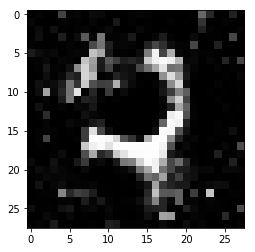

epoch 8802 [D:loss 0.63 D:acc 65.62] [G:loss 1.02]
epoch 8803 [D:loss 0.67 D:acc 56.25] [G:loss 0.89]
epoch 8804 [D:loss 0.63 D:acc 59.38] [G:loss 0.97]
epoch 8805 [D:loss 0.65 D:acc 64.06] [G:loss 0.97]
epoch 8806 [D:loss 0.62 D:acc 59.38] [G:loss 0.97]
epoch 8807 [D:loss 0.63 D:acc 64.06] [G:loss 0.97]
epoch 8808 [D:loss 0.60 D:acc 70.31] [G:loss 1.01]
epoch 8809 [D:loss 0.59 D:acc 68.75] [G:loss 1.06]
epoch 8810 [D:loss 0.60 D:acc 65.62] [G:loss 0.91]
epoch 8811 [D:loss 0.65 D:acc 67.19] [G:loss 1.06]
epoch 8812 [D:loss 0.71 D:acc 51.56] [G:loss 0.99]
epoch 8813 [D:loss 0.66 D:acc 64.06] [G:loss 0.92]
epoch 8814 [D:loss 0.65 D:acc 62.50] [G:loss 1.07]
epoch 8815 [D:loss 0.58 D:acc 71.88] [G:loss 0.97]
epoch 8816 [D:loss 0.70 D:acc 57.81] [G:loss 1.03]
epoch 8817 [D:loss 0.54 D:acc 76.56] [G:loss 0.96]
epoch 8818 [D:loss 0.67 D:acc 64.06] [G:loss 1.07]
epoch 8819 [D:loss 0.67 D:acc 64.06] [G:loss 0.95]
epoch 8820 [D:loss 0.62 D:acc 68.75] [G:loss 0.99]
epoch 8821 [D:loss 0.69 D:acc 5

epoch 8964 [D:loss 0.66 D:acc 57.81] [G:loss 0.92]
epoch 8965 [D:loss 0.60 D:acc 71.88] [G:loss 0.88]
epoch 8966 [D:loss 0.70 D:acc 54.69] [G:loss 1.01]
epoch 8967 [D:loss 0.58 D:acc 67.19] [G:loss 1.03]
epoch 8968 [D:loss 0.63 D:acc 67.19] [G:loss 0.99]
epoch 8969 [D:loss 0.64 D:acc 68.75] [G:loss 0.99]
epoch 8970 [D:loss 0.72 D:acc 53.12] [G:loss 1.11]
epoch 8971 [D:loss 0.68 D:acc 53.12] [G:loss 0.98]
epoch 8972 [D:loss 0.67 D:acc 62.50] [G:loss 1.01]
epoch 8973 [D:loss 0.71 D:acc 51.56] [G:loss 0.95]
epoch 8974 [D:loss 0.63 D:acc 62.50] [G:loss 0.88]
epoch 8975 [D:loss 0.71 D:acc 53.12] [G:loss 1.03]
epoch 8976 [D:loss 0.61 D:acc 68.75] [G:loss 0.90]
epoch 8977 [D:loss 0.59 D:acc 68.75] [G:loss 0.95]
epoch 8978 [D:loss 0.65 D:acc 60.94] [G:loss 0.95]
epoch 8979 [D:loss 0.63 D:acc 59.38] [G:loss 0.95]
epoch 8980 [D:loss 0.66 D:acc 56.25] [G:loss 0.92]
epoch 8981 [D:loss 0.64 D:acc 59.38] [G:loss 0.91]
epoch 8982 [D:loss 0.62 D:acc 60.94] [G:loss 0.98]
epoch 8983 [D:loss 0.67 D:acc 6

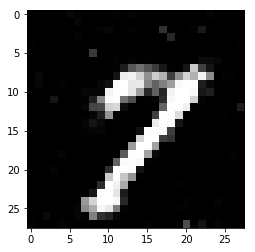

epoch 9002 [D:loss 0.58 D:acc 70.31] [G:loss 1.00]
epoch 9003 [D:loss 0.69 D:acc 62.50] [G:loss 1.01]
epoch 9004 [D:loss 0.63 D:acc 62.50] [G:loss 1.06]
epoch 9005 [D:loss 0.72 D:acc 54.69] [G:loss 0.99]
epoch 9006 [D:loss 0.63 D:acc 64.06] [G:loss 0.97]
epoch 9007 [D:loss 0.70 D:acc 59.38] [G:loss 0.88]
epoch 9008 [D:loss 0.73 D:acc 59.38] [G:loss 0.99]
epoch 9009 [D:loss 0.61 D:acc 67.19] [G:loss 1.04]
epoch 9010 [D:loss 0.60 D:acc 67.19] [G:loss 0.86]
epoch 9011 [D:loss 0.64 D:acc 65.62] [G:loss 1.03]
epoch 9012 [D:loss 0.66 D:acc 62.50] [G:loss 0.97]
epoch 9013 [D:loss 0.65 D:acc 65.62] [G:loss 0.94]
epoch 9014 [D:loss 0.62 D:acc 68.75] [G:loss 0.93]
epoch 9015 [D:loss 0.60 D:acc 71.88] [G:loss 0.88]
epoch 9016 [D:loss 0.63 D:acc 64.06] [G:loss 0.88]
epoch 9017 [D:loss 0.66 D:acc 65.62] [G:loss 0.87]
epoch 9018 [D:loss 0.63 D:acc 68.75] [G:loss 0.93]
epoch 9019 [D:loss 0.64 D:acc 65.62] [G:loss 0.95]
epoch 9020 [D:loss 0.64 D:acc 53.12] [G:loss 0.95]
epoch 9021 [D:loss 0.63 D:acc 7

epoch 9164 [D:loss 0.60 D:acc 67.19] [G:loss 0.89]
epoch 9165 [D:loss 0.64 D:acc 67.19] [G:loss 0.91]
epoch 9166 [D:loss 0.65 D:acc 64.06] [G:loss 1.02]
epoch 9167 [D:loss 0.62 D:acc 68.75] [G:loss 1.07]
epoch 9168 [D:loss 0.63 D:acc 68.75] [G:loss 1.05]
epoch 9169 [D:loss 0.65 D:acc 64.06] [G:loss 1.09]
epoch 9170 [D:loss 0.72 D:acc 56.25] [G:loss 0.99]
epoch 9171 [D:loss 0.65 D:acc 65.62] [G:loss 0.91]
epoch 9172 [D:loss 0.65 D:acc 57.81] [G:loss 0.88]
epoch 9173 [D:loss 0.65 D:acc 64.06] [G:loss 0.96]
epoch 9174 [D:loss 0.65 D:acc 60.94] [G:loss 0.91]
epoch 9175 [D:loss 0.65 D:acc 65.62] [G:loss 0.92]
epoch 9176 [D:loss 0.64 D:acc 67.19] [G:loss 1.03]
epoch 9177 [D:loss 0.62 D:acc 73.44] [G:loss 0.98]
epoch 9178 [D:loss 0.71 D:acc 56.25] [G:loss 0.94]
epoch 9179 [D:loss 0.60 D:acc 65.62] [G:loss 0.90]
epoch 9180 [D:loss 0.61 D:acc 64.06] [G:loss 0.92]
epoch 9181 [D:loss 0.67 D:acc 62.50] [G:loss 0.93]
epoch 9182 [D:loss 0.63 D:acc 65.62] [G:loss 0.91]
epoch 9183 [D:loss 0.64 D:acc 6

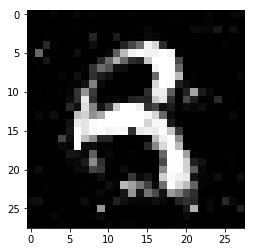

epoch 9202 [D:loss 0.65 D:acc 67.19] [G:loss 0.99]
epoch 9203 [D:loss 0.58 D:acc 75.00] [G:loss 0.89]
epoch 9204 [D:loss 0.62 D:acc 65.62] [G:loss 0.93]
epoch 9205 [D:loss 0.58 D:acc 70.31] [G:loss 0.96]
epoch 9206 [D:loss 0.64 D:acc 62.50] [G:loss 1.01]
epoch 9207 [D:loss 0.63 D:acc 65.62] [G:loss 0.96]
epoch 9208 [D:loss 0.68 D:acc 59.38] [G:loss 0.87]
epoch 9209 [D:loss 0.70 D:acc 64.06] [G:loss 0.91]
epoch 9210 [D:loss 0.61 D:acc 70.31] [G:loss 0.98]
epoch 9211 [D:loss 0.56 D:acc 65.62] [G:loss 0.93]
epoch 9212 [D:loss 0.60 D:acc 73.44] [G:loss 1.00]
epoch 9213 [D:loss 0.71 D:acc 56.25] [G:loss 1.00]
epoch 9214 [D:loss 0.65 D:acc 65.62] [G:loss 0.99]
epoch 9215 [D:loss 0.67 D:acc 60.94] [G:loss 0.99]
epoch 9216 [D:loss 0.64 D:acc 60.94] [G:loss 0.97]
epoch 9217 [D:loss 0.69 D:acc 64.06] [G:loss 0.98]
epoch 9218 [D:loss 0.68 D:acc 50.00] [G:loss 0.91]
epoch 9219 [D:loss 0.72 D:acc 40.62] [G:loss 0.96]
epoch 9220 [D:loss 0.66 D:acc 67.19] [G:loss 0.92]
epoch 9221 [D:loss 0.66 D:acc 6

epoch 9364 [D:loss 0.64 D:acc 62.50] [G:loss 0.91]
epoch 9365 [D:loss 0.64 D:acc 64.06] [G:loss 0.95]
epoch 9366 [D:loss 0.64 D:acc 60.94] [G:loss 0.97]
epoch 9367 [D:loss 0.73 D:acc 53.12] [G:loss 0.88]
epoch 9368 [D:loss 0.70 D:acc 53.12] [G:loss 0.95]
epoch 9369 [D:loss 0.58 D:acc 67.19] [G:loss 1.02]
epoch 9370 [D:loss 0.67 D:acc 62.50] [G:loss 1.01]
epoch 9371 [D:loss 0.61 D:acc 68.75] [G:loss 0.98]
epoch 9372 [D:loss 0.62 D:acc 65.62] [G:loss 0.96]
epoch 9373 [D:loss 0.72 D:acc 60.94] [G:loss 0.92]
epoch 9374 [D:loss 0.69 D:acc 57.81] [G:loss 0.88]
epoch 9375 [D:loss 0.65 D:acc 51.56] [G:loss 1.04]
epoch 9376 [D:loss 0.61 D:acc 68.75] [G:loss 0.94]
epoch 9377 [D:loss 0.70 D:acc 57.81] [G:loss 0.93]
epoch 9378 [D:loss 0.62 D:acc 57.81] [G:loss 0.87]
epoch 9379 [D:loss 0.62 D:acc 67.19] [G:loss 0.93]
epoch 9380 [D:loss 0.54 D:acc 68.75] [G:loss 1.05]
epoch 9381 [D:loss 0.61 D:acc 64.06] [G:loss 0.95]
epoch 9382 [D:loss 0.63 D:acc 62.50] [G:loss 0.99]
epoch 9383 [D:loss 0.63 D:acc 6

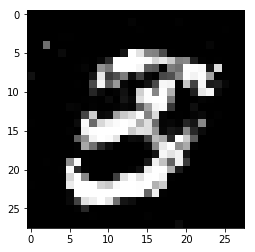

epoch 9402 [D:loss 0.58 D:acc 76.56] [G:loss 0.97]
epoch 9403 [D:loss 0.59 D:acc 70.31] [G:loss 0.90]
epoch 9404 [D:loss 0.70 D:acc 54.69] [G:loss 0.88]
epoch 9405 [D:loss 0.56 D:acc 73.44] [G:loss 0.98]
epoch 9406 [D:loss 0.68 D:acc 60.94] [G:loss 0.94]
epoch 9407 [D:loss 0.63 D:acc 60.94] [G:loss 0.96]
epoch 9408 [D:loss 0.64 D:acc 60.94] [G:loss 0.98]
epoch 9409 [D:loss 0.62 D:acc 67.19] [G:loss 0.95]
epoch 9410 [D:loss 0.61 D:acc 65.62] [G:loss 0.94]
epoch 9411 [D:loss 0.62 D:acc 67.19] [G:loss 0.94]
epoch 9412 [D:loss 0.66 D:acc 60.94] [G:loss 0.99]
epoch 9413 [D:loss 0.62 D:acc 70.31] [G:loss 0.98]
epoch 9414 [D:loss 0.67 D:acc 59.38] [G:loss 0.95]
epoch 9415 [D:loss 0.65 D:acc 60.94] [G:loss 0.96]
epoch 9416 [D:loss 0.64 D:acc 65.62] [G:loss 0.93]
epoch 9417 [D:loss 0.60 D:acc 62.50] [G:loss 1.12]
epoch 9418 [D:loss 0.65 D:acc 59.38] [G:loss 1.00]
epoch 9419 [D:loss 0.65 D:acc 64.06] [G:loss 0.97]
epoch 9420 [D:loss 0.61 D:acc 65.62] [G:loss 0.93]
epoch 9421 [D:loss 0.66 D:acc 5

epoch 9566 [D:loss 0.62 D:acc 65.62] [G:loss 1.00]
epoch 9567 [D:loss 0.61 D:acc 71.88] [G:loss 0.89]
epoch 9568 [D:loss 0.63 D:acc 70.31] [G:loss 1.04]
epoch 9569 [D:loss 0.55 D:acc 76.56] [G:loss 1.06]
epoch 9570 [D:loss 0.58 D:acc 76.56] [G:loss 0.91]
epoch 9571 [D:loss 0.66 D:acc 59.38] [G:loss 1.00]
epoch 9572 [D:loss 0.62 D:acc 64.06] [G:loss 1.00]
epoch 9573 [D:loss 0.63 D:acc 68.75] [G:loss 1.09]
epoch 9574 [D:loss 0.59 D:acc 65.62] [G:loss 1.04]
epoch 9575 [D:loss 0.66 D:acc 62.50] [G:loss 0.96]
epoch 9576 [D:loss 0.64 D:acc 60.94] [G:loss 0.82]
epoch 9577 [D:loss 0.64 D:acc 59.38] [G:loss 0.98]
epoch 9578 [D:loss 0.59 D:acc 68.75] [G:loss 1.10]
epoch 9579 [D:loss 0.62 D:acc 67.19] [G:loss 1.01]
epoch 9580 [D:loss 0.61 D:acc 71.88] [G:loss 1.03]
epoch 9581 [D:loss 0.67 D:acc 59.38] [G:loss 0.87]
epoch 9582 [D:loss 0.69 D:acc 54.69] [G:loss 0.99]
epoch 9583 [D:loss 0.61 D:acc 71.88] [G:loss 0.94]
epoch 9584 [D:loss 0.63 D:acc 62.50] [G:loss 1.04]
epoch 9585 [D:loss 0.62 D:acc 6

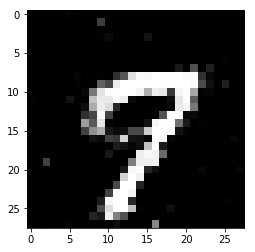

epoch 9602 [D:loss 0.64 D:acc 59.38] [G:loss 0.95]
epoch 9603 [D:loss 0.62 D:acc 64.06] [G:loss 0.94]
epoch 9604 [D:loss 0.69 D:acc 54.69] [G:loss 1.03]
epoch 9605 [D:loss 0.65 D:acc 64.06] [G:loss 0.92]
epoch 9606 [D:loss 0.56 D:acc 71.88] [G:loss 0.89]
epoch 9607 [D:loss 0.66 D:acc 62.50] [G:loss 0.84]
epoch 9608 [D:loss 0.61 D:acc 64.06] [G:loss 0.97]
epoch 9609 [D:loss 0.64 D:acc 60.94] [G:loss 0.97]
epoch 9610 [D:loss 0.59 D:acc 71.88] [G:loss 0.99]
epoch 9611 [D:loss 0.60 D:acc 71.88] [G:loss 0.99]
epoch 9612 [D:loss 0.66 D:acc 65.62] [G:loss 1.05]
epoch 9613 [D:loss 0.64 D:acc 62.50] [G:loss 0.93]
epoch 9614 [D:loss 0.63 D:acc 65.62] [G:loss 0.81]
epoch 9615 [D:loss 0.77 D:acc 46.88] [G:loss 0.87]
epoch 9616 [D:loss 0.62 D:acc 65.62] [G:loss 0.97]
epoch 9617 [D:loss 0.65 D:acc 64.06] [G:loss 0.82]
epoch 9618 [D:loss 0.69 D:acc 60.94] [G:loss 0.93]
epoch 9619 [D:loss 0.71 D:acc 57.81] [G:loss 0.94]
epoch 9620 [D:loss 0.70 D:acc 56.25] [G:loss 0.88]
epoch 9621 [D:loss 0.64 D:acc 6

epoch 9767 [D:loss 0.62 D:acc 64.06] [G:loss 0.97]
epoch 9768 [D:loss 0.68 D:acc 59.38] [G:loss 0.97]
epoch 9769 [D:loss 0.71 D:acc 57.81] [G:loss 1.02]
epoch 9770 [D:loss 0.62 D:acc 70.31] [G:loss 0.97]
epoch 9771 [D:loss 0.62 D:acc 68.75] [G:loss 1.07]
epoch 9772 [D:loss 0.67 D:acc 59.38] [G:loss 1.04]
epoch 9773 [D:loss 0.68 D:acc 54.69] [G:loss 0.95]
epoch 9774 [D:loss 0.64 D:acc 62.50] [G:loss 0.97]
epoch 9775 [D:loss 0.66 D:acc 60.94] [G:loss 1.02]
epoch 9776 [D:loss 0.62 D:acc 68.75] [G:loss 0.99]
epoch 9777 [D:loss 0.59 D:acc 70.31] [G:loss 0.92]
epoch 9778 [D:loss 0.73 D:acc 45.31] [G:loss 0.94]
epoch 9779 [D:loss 0.70 D:acc 56.25] [G:loss 1.10]
epoch 9780 [D:loss 0.64 D:acc 62.50] [G:loss 1.07]
epoch 9781 [D:loss 0.63 D:acc 62.50] [G:loss 1.00]
epoch 9782 [D:loss 0.67 D:acc 64.06] [G:loss 0.99]
epoch 9783 [D:loss 0.61 D:acc 71.88] [G:loss 0.95]
epoch 9784 [D:loss 0.66 D:acc 57.81] [G:loss 0.84]
epoch 9785 [D:loss 0.66 D:acc 56.25] [G:loss 0.92]
epoch 9786 [D:loss 0.68 D:acc 5

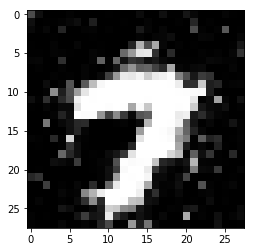

epoch 9802 [D:loss 0.66 D:acc 57.81] [G:loss 1.02]
epoch 9803 [D:loss 0.65 D:acc 62.50] [G:loss 1.04]
epoch 9804 [D:loss 0.67 D:acc 60.94] [G:loss 1.04]
epoch 9805 [D:loss 0.58 D:acc 71.88] [G:loss 1.00]
epoch 9806 [D:loss 0.67 D:acc 57.81] [G:loss 0.97]
epoch 9807 [D:loss 0.60 D:acc 67.19] [G:loss 0.92]
epoch 9808 [D:loss 0.67 D:acc 54.69] [G:loss 1.00]
epoch 9809 [D:loss 0.67 D:acc 59.38] [G:loss 0.91]
epoch 9810 [D:loss 0.61 D:acc 64.06] [G:loss 0.87]
epoch 9811 [D:loss 0.64 D:acc 68.75] [G:loss 0.98]
epoch 9812 [D:loss 0.62 D:acc 65.62] [G:loss 0.95]
epoch 9813 [D:loss 0.63 D:acc 59.38] [G:loss 0.96]
epoch 9814 [D:loss 0.57 D:acc 73.44] [G:loss 1.01]
epoch 9815 [D:loss 0.68 D:acc 53.12] [G:loss 1.02]
epoch 9816 [D:loss 0.61 D:acc 67.19] [G:loss 1.00]
epoch 9817 [D:loss 0.68 D:acc 62.50] [G:loss 0.97]
epoch 9818 [D:loss 0.68 D:acc 64.06] [G:loss 1.07]
epoch 9819 [D:loss 0.66 D:acc 59.38] [G:loss 0.96]
epoch 9820 [D:loss 0.69 D:acc 50.00] [G:loss 0.96]
epoch 9821 [D:loss 0.63 D:acc 6

epoch 9965 [D:loss 0.63 D:acc 64.06] [G:loss 1.00]
epoch 9966 [D:loss 0.68 D:acc 62.50] [G:loss 0.92]
epoch 9967 [D:loss 0.65 D:acc 64.06] [G:loss 0.98]
epoch 9968 [D:loss 0.59 D:acc 62.50] [G:loss 0.94]
epoch 9969 [D:loss 0.61 D:acc 62.50] [G:loss 1.09]
epoch 9970 [D:loss 0.68 D:acc 62.50] [G:loss 0.93]
epoch 9971 [D:loss 0.64 D:acc 64.06] [G:loss 1.03]
epoch 9972 [D:loss 0.69 D:acc 54.69] [G:loss 1.00]
epoch 9973 [D:loss 0.64 D:acc 65.62] [G:loss 0.91]
epoch 9974 [D:loss 0.63 D:acc 68.75] [G:loss 0.94]
epoch 9975 [D:loss 0.67 D:acc 57.81] [G:loss 0.94]
epoch 9976 [D:loss 0.70 D:acc 59.38] [G:loss 0.90]
epoch 9977 [D:loss 0.60 D:acc 70.31] [G:loss 0.97]
epoch 9978 [D:loss 0.73 D:acc 54.69] [G:loss 1.02]
epoch 9979 [D:loss 0.70 D:acc 56.25] [G:loss 1.00]
epoch 9980 [D:loss 0.65 D:acc 65.62] [G:loss 0.99]
epoch 9981 [D:loss 0.67 D:acc 57.81] [G:loss 1.03]
epoch 9982 [D:loss 0.66 D:acc 60.94] [G:loss 1.02]
epoch 9983 [D:loss 0.66 D:acc 53.12] [G:loss 1.04]
epoch 9984 [D:loss 0.61 D:acc 7

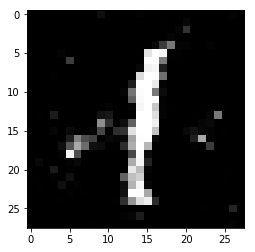

In [62]:
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=10000, batch_size=32, sample_interval=200)

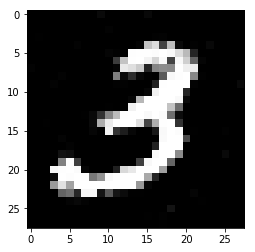

In [97]:
gan.sample_images()